In [1]:
# importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

# <a id='1'>1.Data</a>

In [2]:
os.chdir('D:\\Data Science\\Vishay_python\\Clustering\\Assingment')

In [3]:
raw_data = pd.read_excel('Case_study_data.xlsx')
pd.set_option('display.max_rows', 500)


In [4]:
Churned_main = pd.read_excel('Case_study_data.xlsx', sheet_name="Churn Customers")
Active_main= pd.read_excel('Case_study_data.xlsx', sheet_name="Active Customers ")

In [5]:

Churned=Churned_main.copy()
Active = Active_main.copy()

# <a id='2'>2. Data Overview</a>

# <a id='2.1'>2.1. Active Data</a>

In [6]:

print ("Rows     : " ,Active.shape[0])
print ("Columns  : " ,Active.shape[1])
print ("\nFeatures : \n" ,Active.columns.tolist())
Active.info()

Total_Missing_Value=Active.isnull().sum(axis=0).sort_values(ascending=False)
Percentage_Of_Missing_Values=((Active.isnull().sum(axis=0))/Active.isnull().count(axis=0))*100

missing_values_overview=pd.concat([Total_Missing_Value, Percentage_Of_Missing_Values],axis=1, keys=['Total_Missing_Values', 'Percentage_Of_Missing_values'])
missing_values_overview

Rows     :  9999
Columns  :  29

Features : 
 ['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        9998 non-null   object        
 1   ACCOUNT_STATUS             9998 non-null   object        
 2   FIRST_COMMUNICATION_DATE   9989 non-null   datetime64[ns]
 3   UPGRADE_DATE               9989 non-null   datetime64[ns

,Total_Missing_Values,Percentage_Of_Missing_values
COMPUTER_OWNER,3055,30.553055
SALES_CHANNEL,2906,29.062906
FEEDBACK,1914,19.141914
PRESENCE_OF_CHILDREN,1315,13.151315
GENDER,1271,12.711271
SERVICE_ PLAN,1239,12.391239
WARRANTY_NAME,957,9.570957
SALES_SOURCE,693,6.930693
MODEL,676,6.760676
SATELLITE,396,3.960396


overview of active data i.e. the percenatge of missing values & their percentages , uniqueness in varibales

# <a id='2.2'>2.2. Data Overview</a> 

In [7]:
print ("Rows     : " ,Churned.shape[0])
print ("Columns  : " ,Churned.shape[1])
print ("\nFeatures : \n" ,Churned.columns.tolist())

Churned.info()

Total_Missing_Value=Churned.isnull().sum(axis=0).sort_values(ascending=False)
Percentage_Of_Missing_Values=((Churned.isnull().sum(axis=0))/Churned.isnull().count(axis=0))*100

missing_values_overview=pd.concat([Total_Missing_Value, Percentage_Of_Missing_Values],axis=1, keys=['Total_Missing_Values', 'Percentage_Of_Missing_values'])
missing_values_overview

Rows     :  10000
Columns  :  30

Features : 
 ['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE', 'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        10000 non-null  object        
 1   ACCOUNT_STATUS             9985 non-null   object        
 2   FIRST_COMMUNICATION_DATE   10000 non-null  datetime64[ns]
 3   CHURN_DATE                 10000 non-null

,Total_Missing_Values,Percentage_Of_Missing_values
COMPUTER_OWNER,3243,32.43
SALES_CHANNEL,2602,26.02
FEEDBACK,2028,20.28
SERVICE_PLAN,1482,14.82
PRESENCE_OF_CHILDREN,1252,12.52
GENDER,1238,12.38
SATELLITE,1013,10.13
UPGRADE_DATE,879,8.79
DIRECT_INDIRECT_CHANNEL,784,7.84
MODEL,710,7.10


overview of active data i.e. the percenatge of missing values & their percentages , uniqueness in varibales


# <a id='3'>3. Exploratory Data Analysis</a>

In [8]:
# Analysis of each variable of both active and churned data simultaneously

In [9]:
Active.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [10]:
Churned.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [11]:
#renaming the "SERVICE_PLAN" as this seems to be misspelled
Active['SERVICE_PLAN']=Active['SERVICE_ PLAN']

In [12]:
Active=Active.drop(['SERVICE_ PLAN'],axis=1)

In [13]:
Active['SERVICE_PLAN'].value_counts()

Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_PLAN, dtype: int64

In [14]:
#Active['SERVICE_PLAN']=Active['SERVICE_ PLAN'].replace(to_replace='Basic_Ltd', value='Basic')
#Active['SERVICE_PLAN']=Active['SERVICE_ PLAN'].replace(to_replace='Proplus', value='Pro')


In [15]:
Churned['SERVICE_PLAN'].value_counts()

Elite                1795
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

In [16]:
Churned['SERVICE_PLAN']=Churned['SERVICE_PLAN'].replace(to_replace='Professional Plus', value='Proplus')
Churned['SERVICE_PLAN']=Churned['SERVICE_PLAN'].replace(to_replace='Professional', value='Pro')
Churned['SERVICE_PLAN']=Churned['SERVICE_PLAN'].replace(to_replace='Power15', value='Power150')


In [17]:
Churned['SERVICE_PLAN'].value_counts()

Elite        1795
Pro          1335
SO           1184
Proplus      1169
Home         1122
Basic_Ltd     666
Power150      624
Basic         623
Name: SERVICE_PLAN, dtype: int64

Replaced
In churned customers we have extra service plans i.e. 'S.O' , 'Professional' , 'Power15' , 'Professional plus' 

In [18]:
#Churned['SERVICE_PLAN']=Churned['SERVICE_PLAN'].replace(to_replace='Basic_Ltd', value='Basic')
#Churned['SERVICE_PLAN']=Churned['SERVICE_PLAN'].replace(to_replace='Professional Plus' , value='Professional')
#Churned['SERVICE_PLAN']=Churned['SERVICE_PLAN'].replace(to_replace='Proplus', value='Pro')


In [19]:
Active['ACCOUNT_STATUS'].value_counts()

Active      9985
Inactive      13
Name: ACCOUNT_STATUS, dtype: int64

In [20]:
# dropping the inactive accounts from active data

Active = Active[Active['ACCOUNT_STATUS'] == 'Active'] 


In [21]:
Active['ACCOUNT_STATUS'].value_counts()

Active    9985
Name: ACCOUNT_STATUS, dtype: int64

In [22]:
Active

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,FIRST_NAME,...,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN
0,AMR-11112345,Active,2001-11-27,2003-12-14,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,Ace,...,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N,NaN
1,AMR-14837287,Active,2003-05-02,2006-08-08,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,Robert,...,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N,Pro
2,AMR-14837803,Active,2001-01-28,2004-03-17,HN9000,Call Center,Indirect,NCC,HNS Customers,EDWARD,...,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N,Power150
3,AMR-14837821,Active,2001-11-20,2005-03-27,DW6000,Sales Agents,Direct,NaN,HNS Customers,Dannya,...,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN,Power150
4,AMR-14839297,Active,2002-02-27,2004-06-14,HN7000S,Call Center,Indirect,TAG,HNS Customers,Joannea,...,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,AMR-49996971,Active,2001-12-03,2004-12-26,HN7000S,NaN,Indirect,RS&I,HNS Customers,Darna,...,0,DW7000 Upgrade,NaN,8-2-1980,32,4,0.0,NaN,N,Basic_Ltd
9994,AMR-49997196,Active,2002-03-24,2005-05-17,DW4000,Web orders,Indirect,TAG,HNS Customers,Phillip,...,0,Classic Migration,1.0,17-12-1973,39,4,0.0,0.0,N,Home
9995,AMR-49998050,Active,2002-04-03,2006-04-03,HN7000S,Retail/others,Direct,LiveBridge Communications LLC,HNS Customers,Dana,...,NaN,HN7000 Upgrade,1.0,.,.,NaN,0.0,NaN,NaN,Elite
9996,AMR-49998608,Active,2002-03-08,2003-10-31,HN9000,Retail/others,Indirect,InfoDish,HNS Customers,Erica,...,0,Dealer-Generated Sale,2.0,15-10-1979,33,5,1.0,0.0,N,Pro


Now we are left with the shape (9985,29)

In [23]:
Churned['ACCOUNT_STATUS'].value_counts()

Closed    9985
Name: ACCOUNT_STATUS, dtype: int64

In [24]:
Churned['ACCOUNT_STATUS'].isnull().sum()

15

In [25]:
#Dropping the missing values of account status in churned data 

Churned.dropna(subset = ["ACCOUNT_STATUS"], inplace=True)

Since we are taking account status as the dependent variable therefore, instead of doing any change in the null values we shall drop the missing values and also we are having very less amount of missing values we can drop the missing rows which will not affect the data significantlly

In [26]:
Churned['ACCOUNT_STATUS'].isnull().sum()

0

In [27]:
Churned['MODEL'].value_counts()

HN9000     2844
HN7000S    1897
DW4000     1617
DW7000     1498
DW6000     1378
UNK          43
Name: MODEL, dtype: int64

In [28]:
Active['MODEL'].value_counts()

HN7000S    4292
HN9000     1984
UNK         977
DW4020      648
DW4000      645
DW6000      514
DW7000      250
Name: MODEL, dtype: int64

In [29]:
Active.groupby('MODEL')['UPGRADE_DATE'].nunique().sort_values(ascending=False)

MODEL
HN7000S    1241
HN9000      998
UNK         675
DW4000      509
DW4020      503
DW6000      426
DW7000      230
Name: UPGRADE_DATE, dtype: int64

In [30]:
Churned.groupby('MODEL')['UPGRADE_DATE'].nunique().sort_values(ascending=False)

MODEL
HN9000     1153
HN7000S     933
DW4000      824
DW7000      819
DW6000      784
UNK          37
Name: UPGRADE_DATE, dtype: int64

In [31]:
Active['MODEL']=Active['MODEL'].replace(to_replace='DW4020', value='DW4000')


In [32]:
Active['MODEL'].value_counts()

HN7000S    4292
HN9000     1984
DW4000     1293
UNK         977
DW6000      514
DW7000      250
Name: MODEL, dtype: int64

Drastic increment can be seen in the model 'HN7000S' and also new model 'DW4020' has been introduced 

We are having maximum model of HN9000

In [33]:
Active['SALES_CHANNEL'].value_counts()

Sales Agents     1452
Retail/others    1439
Vars             1421
Web orders       1389
Call Center      1381
Name: SALES_CHANNEL, dtype: int64

In [34]:
Churned['SALES_CHANNEL'].value_counts()

Call Centers     1669
Retail/Others    1576
Web Orders       1418
Sales Agents     1369
Vars             1357
Name: SALES_CHANNEL, dtype: int64

In [35]:
Active['DIRECT_INDIRECT_CHANNEL'].value_counts()

Indirect    7616
Direct      2316
0              9
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [36]:
# replacing the missing values with the mode value of the variable

Active['DIRECT_INDIRECT_CHANNEL']=Active['DIRECT_INDIRECT_CHANNEL'].replace(to_replace=0, value='Indirect')


In [37]:
Active['DIRECT_INDIRECT_CHANNEL']=Active['DIRECT_INDIRECT_CHANNEL'].replace(to_replace='Indirect', value=0)
Active['DIRECT_INDIRECT_CHANNEL']=Active['DIRECT_INDIRECT_CHANNEL'].replace(to_replace='Direct', value=1)


In [38]:
Active['DIRECT_INDIRECT_CHANNEL'].value_counts()

0.0    7625
1.0    2316
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [39]:
Churned['DIRECT_INDIRECT_CHANNEL'].value_counts()

Indirect    6402
Direct      2800
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [40]:
Churned['DIRECT_INDIRECT_CHANNEL']=Churned['DIRECT_INDIRECT_CHANNEL'].replace(to_replace='Indirect', value=0)
Churned['DIRECT_INDIRECT_CHANNEL']=Churned['DIRECT_INDIRECT_CHANNEL'].replace(to_replace='Direct', value=1)


In [41]:
Churned['DIRECT_INDIRECT_CHANNEL'].value_counts()

0.0    6402
1.0    2800
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [42]:
Churned['DIRECT_INDIRECT_CHANNEL'].dtype

dtype('float64')

In [43]:
Active['SALES_SOURCE'].value_counts()

TAG                                        1726
Hughes Web Order                           1369
RS&I                                       1051
Perfect 10                                  858
AmericanSat                                 813
NCC                                         590
ACS                                         438
LiveBridge Communications LLC               435
InfoDish                                    366
UNKNOWN                                     299
ACS Pre-Install                             298
Best Buy                                    291
Verisign Web Ordering                       240
MiniDish                                    121
ValueElectronics                             94
NRTC                                         64
PEGASUS BROADBAND COMMUNICATIO               64
PEGASUS                                      34
D&H DISTRIBUTING                             25
Hughes Internal Sales                        16
OROURKE BROTHERS                        

In [44]:
#subsitutting the missing values with the unknwon category

Active['SALES_SOURCE']=Active['SALES_SOURCE'].replace(to_replace=0, value='UNKNOWN')

In [45]:
Active['SALES_SOURCE'].value_counts()

TAG                                        1726
Hughes Web Order                           1369
RS&I                                       1051
Perfect 10                                  858
AmericanSat                                 813
NCC                                         590
ACS                                         438
LiveBridge Communications LLC               435
InfoDish                                    366
UNKNOWN                                     309
ACS Pre-Install                             298
Best Buy                                    291
Verisign Web Ordering                       240
MiniDish                                    121
ValueElectronics                             94
PEGASUS BROADBAND COMMUNICATIO               64
NRTC                                         64
PEGASUS                                      34
D&H DISTRIBUTING                             25
OROURKE BROTHERS                             16
Hughes Internal Sales                   

In [46]:
len(Active['SALES_SOURCE'].value_counts())


29

In [47]:
Churned['SALES_SOURCE'].value_counts()

TAG                                        1190
Red Ventures LLC (SA)                      1091
DialAmerica Marketing Inc (CC)              646
Communication Solutions LLC (CC)            622
OKS Ameridial Inc (CC)                      585
Hughes Web Order                            568
LiveBridge Communications LLC               522
I-Dish.com LLC (SA)                         405
ALORAD Inc (SA)                             380
ACS                                         376
NationWide Satellite (SA)                   335
ACS Pre-Install                             162
Electronic Express (SA)                     131
RS&I                                        123
EBN Financial dba Dish Systems (SA)         118
Best Buy                                    107
AmericanSat                                 106
Elite Satellite and Home Theater Inc (S     105
Buy Telco                                    95
Perfect 10                                   94
GoDish.com Ltd LLP (SA)                 

In [48]:
len(Churned['SALES_SOURCE'].value_counts())

133

In [49]:
Active['CITY'].value_counts()

GERMANTOWN       69
AUBURN           58
MARSHALL         51
GAITHERSBURG     45
FREDERICKSBRG    44
                 ..
SAN FRANCISCO     3
CANANDAIGUA       3
GRANT TWP         3
HVRE DE GRACE     2
COUPLAND          2
Name: CITY, Length: 828, dtype: int64

In [50]:
# states with count of cities
Active.groupby('STATE')['CITY'].nunique().sort_values(ascending=False)


STATE
 CA    103
 TX     84
 NY     41
 VA     40
 MD     37
 CO     36
 MI     35
 IL     34
 MO     33
 AR     29
 OH     25
 OR     24
 WA     22
 MS     21
 OK     21
 AZ     19
 PA     18
 NC     18
 TN     17
 IN     16
 FL     15
 AL     14
 WI     13
 GA     12
 MN     12
 LA     12
 NM     11
 NV     11
 IA      9
 WY      9
 NJ      9
 KS      8
 SC      8
 MT      8
 WV      7
 KY      7
 MA      7
 ID      6
 NE      4
 NH      4
 ME      3
 SD      3
 PR      2
 DE      2
 UT      2
 VT      2
 CT      1
Name: CITY, dtype: int64

In [51]:

Churned.groupby('STATE')['CITY'].nunique().sort_values(ascending=False)

STATE
 CA    70
 TX    52
 NY    33
 CO    29
 VA    28
 MD    27
 IL    24
 MI    22
 MO    21
 OR    18
 WA    16
 AR    15
 AZ    15
 MS    14
 NC    14
 PA    13
 OH    10
 LA    10
 OK    10
 FL    10
 TN    10
 NM     9
 NV     8
 GA     8
 WI     8
 MN     7
 IA     6
 IN     6
 KY     6
 MT     6
 AL     6
 MA     6
 SC     5
 WY     5
 KS     4
 WV     4
 NJ     4
 ID     3
 NH     3
 ME     2
 NE     2
 SD     2
 UT     2
 VT     2
 PR     1
 DE     1
Name: CITY, dtype: int64

In [52]:
Churned['CITY'].value_counts()

AUBURN        89
TRINITY       75
FREDERICK     62
ROGERS        62
GUNNISON      60
              ..
MOOSE          3
LEMPSTER       3
HUDDLESTON     3
HAZLEHURST     3
PELLSTON       3
Name: CITY, Length: 553, dtype: int64

we have 553 states in  churned data and in active data we have 828 states 
so,that means we have expanded our network to some more area.

In [53]:
Active['FEEDBACK'].value_counts()

GOOD    5026
BAD     3048
Name: FEEDBACK, dtype: int64

In [54]:

Active.groupby('FEEDBACK')['UPGRADE_DATE'].nunique().sort_values(ascending=False)

FEEDBACK
GOOD    1326
BAD     1170
Name: UPGRADE_DATE, dtype: int64

In [55]:
Active['FEEDBACK']=Active['FEEDBACK'].replace(to_replace='BAD', value=0)
Active['FEEDBACK']=Active['FEEDBACK'].replace(to_replace='GOOD', value=1)

In [56]:
Churned['FEEDBACK'].value_counts()

BAD     5046
GOOD    2913
Name: FEEDBACK, dtype: int64

In [57]:
Churned['FEEDBACK']=Churned['FEEDBACK'].replace(to_replace='BAD', value=0)
Churned['FEEDBACK']=Churned['FEEDBACK'].replace(to_replace='GOOD', value=1)

In [58]:
Churned['FEEDBACK'].value_counts()

0.0    5046
1.0    2913
Name: FEEDBACK, dtype: int64

In [59]:
Active['SATELLITE'].value_counts()

SPACEWAY3       1386
SM5-VER-5K       885
0                842
SM5-VER-15K      811
G17-HOR-6K       720
AM6-HOR-21K      667
G17-HOR-2K       648
SM5-VER-1K       562
SM5-HOR-6K       428
SM5-VER-7K       388
AM9-VER-2K       357
SM5-HOR-14K      346
HZN2-VER-4K      254
G16-VER-15K      146
G3C-VER-21K       99
G16-VER-1K        78
G16-HOR-8K        75
G3C-VER-24K       67
HZN2-VER-8K       67
AM9-HOR-21K       61
AM32-HOR-19K      54
HZN-HOR-8K        51
HZN-VER-23K       50
HZN-HOR-19K       49
G16-VER-21K       44
G3C-VER-9K        42
AM9-HOR-17K       34
HZN-VER-6K        32
HZN2-VER-5K       32
G16-HOR-2K        31
SM6-HOR-13K       29
SM6-HOR-12K       27
SM6-VER-2K        26
AM32-HOR-7K       26
HZN-VER-11K       23
AM9-HOR-19K       23
G16-VER-2K        23
AM9-VER-22K       19
G28-HOR-16K       18
G26-HOR-14K       16
AMC-HOR-10K       13
G28-HOR-10K       12
SM6-HOR-10K       12
AM9-VER-2K         9
AMC-VER-5K         8
Name: SATELLITE, dtype: int64

In [60]:
# creating a new category for values in 0 
Active['SATELLITE']=Active['SATELLITE'].replace(to_replace=0, value='UNKNOWN')

In [61]:
Active['SATELLITE'].value_counts()

SPACEWAY3       1386
SM5-VER-5K       885
UNKNOWN          842
SM5-VER-15K      811
G17-HOR-6K       720
AM6-HOR-21K      667
G17-HOR-2K       648
SM5-VER-1K       562
SM5-HOR-6K       428
SM5-VER-7K       388
AM9-VER-2K       357
SM5-HOR-14K      346
HZN2-VER-4K      254
G16-VER-15K      146
G3C-VER-21K       99
G16-VER-1K        78
G16-HOR-8K        75
HZN2-VER-8K       67
G3C-VER-24K       67
AM9-HOR-21K       61
AM32-HOR-19K      54
HZN-HOR-8K        51
HZN-VER-23K       50
HZN-HOR-19K       49
G16-VER-21K       44
G3C-VER-9K        42
AM9-HOR-17K       34
HZN-VER-6K        32
HZN2-VER-5K       32
G16-HOR-2K        31
SM6-HOR-13K       29
SM6-HOR-12K       27
AM32-HOR-7K       26
SM6-VER-2K        26
HZN-VER-11K       23
AM9-HOR-19K       23
G16-VER-2K        23
AM9-VER-22K       19
G28-HOR-16K       18
G26-HOR-14K       16
AMC-HOR-10K       13
SM6-HOR-10K       12
G28-HOR-10K       12
AM9-VER-2K         9
AMC-VER-5K         8
Name: SATELLITE, dtype: int64

In [62]:
Active['SATELLITE'].value_counts()

SPACEWAY3       1386
SM5-VER-5K       885
UNKNOWN          842
SM5-VER-15K      811
G17-HOR-6K       720
AM6-HOR-21K      667
G17-HOR-2K       648
SM5-VER-1K       562
SM5-HOR-6K       428
SM5-VER-7K       388
AM9-VER-2K       357
SM5-HOR-14K      346
HZN2-VER-4K      254
G16-VER-15K      146
G3C-VER-21K       99
G16-VER-1K        78
G16-HOR-8K        75
HZN2-VER-8K       67
G3C-VER-24K       67
AM9-HOR-21K       61
AM32-HOR-19K      54
HZN-HOR-8K        51
HZN-VER-23K       50
HZN-HOR-19K       49
G16-VER-21K       44
G3C-VER-9K        42
AM9-HOR-17K       34
HZN-VER-6K        32
HZN2-VER-5K       32
G16-HOR-2K        31
SM6-HOR-13K       29
SM6-HOR-12K       27
AM32-HOR-7K       26
SM6-VER-2K        26
HZN-VER-11K       23
AM9-HOR-19K       23
G16-VER-2K        23
AM9-VER-22K       19
G28-HOR-16K       18
G26-HOR-14K       16
AMC-HOR-10K       13
SM6-HOR-10K       12
G28-HOR-10K       12
AM9-VER-2K         9
AMC-VER-5K         8
Name: SATELLITE, dtype: int64

In [63]:
Satellite=[]
for i in Active['SATELLITE']:
        temp = str(i)
    
        if(temp=="nan"):
            Satellite.append(np.nan)
        else:
            p = temp.split("-",1)
            Satellite.append(p[0])
    

In [64]:
Active['Satellite']=Satellite
Active['Satellite'].value_counts()

SM5          3420
SPACEWAY3    1386
G17          1368
UNKNOWN       842
AM6           667
AM9           503
G16           397
HZN2          353
G3C           208
HZN           205
SM6            94
AM32           80
G28            30
AMC            21
G26            16
Name: Satellite, dtype: int64

In [65]:
Active['Satellite']=Active['Satellite'].replace(to_replace='0', value='UNKNOWN')
Active['Satellite']=Active['Satellite'].replace(to_replace='HZN2', value='HZN')
Active['Satellite']=Active['Satellite'].replace(to_replace='AM32', value='AM9')
Active['Satellite']=Active['Satellite'].replace(to_replace='G17', value='G16')

In [66]:
Active['Satellite'].value_counts()

SM5          3420
G16          1765
SPACEWAY3    1386
UNKNOWN       842
AM6           667
AM9           583
HZN           558
G3C           208
SM6            94
G28            30
AMC            21
G26            16
Name: Satellite, dtype: int64

In [67]:
Churned['SATELLITE'].value_counts()

SPACEWAY3      2455
G3C-VER-24K     973
SM6-HOR-10K     803
HZN-HOR-8K      601
G16-VER-15K     520
SM5-VER-7K      517
G28-HOR-16K     517
AM6-HOR-21K     504
G26-HOR-14K     475
HZN-VER-23K     427
G28-HOR-10K     427
AMC-VER-5K      418
AM9-HOR-17K     336
Name: SATELLITE, dtype: int64

In [68]:
Satellite_chu=[]
for i in Churned['SATELLITE']:
        temp = str(i)
    
        if(temp=="nan"):
            Satellite_chu.append(np.nan)
        else:
            p = temp.split("-",1)
            Satellite_chu.append(p[0])
    

In [69]:
Churned['Satellite']=Satellite_chu

In [70]:
Churned['Satellite'].value_counts()

SPACEWAY3    2455
HZN          1028
G3C           973
G28           944
SM6           803
G16           520
SM5           517
AM6           504
G26           475
AMC           418
AM9           336
Name: Satellite, dtype: int64

we can see that their is increment in the satellites also

In [71]:
Active['SITE_TYPE_DESC'].value_counts()

Broadband Remote    7743
Spaceway            2232
Name: SITE_TYPE_DESC, dtype: int64

In [72]:
Active['SITE_TYPE_DESC']=Active['SITE_TYPE_DESC'].replace(to_replace='Broadband Remote', value=1)
Active['SITE_TYPE_DESC']=Active['SITE_TYPE_DESC'].replace(to_replace='Spaceway', value=0)

In [73]:
Active['SITE_TYPE_DESC'].value_counts()

1.0    7743
0.0    2232
Name: SITE_TYPE_DESC, dtype: int64

In [74]:
Churned['SITE_TYPE_DESC'].value_counts()

Spaceway            6105
Broadband Remote    3817
Name: SITE_TYPE_DESC, dtype: int64

In [75]:
Churned['SITE_TYPE_DESC']=Churned['SITE_TYPE_DESC'].replace(to_replace='Broadband Remote', value=1)
Churned['SITE_TYPE_DESC']=Churned['SITE_TYPE_DESC'].replace(to_replace='Spaceway', value=0)

In [76]:
Churned['SITE_TYPE_DESC'].value_counts()

0.0    6105
1.0    3817
Name: SITE_TYPE_DESC, dtype: int64

In [77]:
Active['WARRANTY_NAME'].value_counts()

0                                                8519
EXPRESS REPAIR HOME WITH TERM                     295
EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM      52
EXPRESS REPAIR BASIC                               50
EXPRESS REPAIR HOME                                44
EXPRESS REPAIR BUSINESS WITH TERM                  38
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM       20
SRVC ASSUR STD EXISTING CUST NO COMMIT             17
SRVC ASSUR STD NEW CUST                             7
Name: WARRANTY_NAME, dtype: int64

In [78]:
Active['WARRANTY_NAME']=Active['WARRANTY_NAME'].replace(to_replace=0, value='UNKNOWN')

In [79]:
Active['WARRANTY_NAME'].value_counts()

UNKNOWN                                          8519
EXPRESS REPAIR HOME WITH TERM                     295
EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM      52
EXPRESS REPAIR BASIC                               50
EXPRESS REPAIR HOME                                44
EXPRESS REPAIR BUSINESS WITH TERM                  38
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM       20
SRVC ASSUR STD EXISTING CUST NO COMMIT             17
SRVC ASSUR STD NEW CUST                             7
Name: WARRANTY_NAME, dtype: int64

In [80]:
Churned['WARRANTY_NAME'].value_counts()

0                                               6106
EXPRESS REPAIR BASIC                            2469
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          296
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

In [81]:
Churned['WARRANTY_NAME']=Churned['WARRANTY_NAME'].replace(to_replace=0, value='UNKNOWN')

In [82]:
Churned['WARRANTY_NAME'].value_counts()

UNKNOWN                                         6106
EXPRESS REPAIR BASIC                            2469
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          296
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

In [83]:
Active['MOST_RECENT_SALES_CHANNEL'].value_counts()

HN7000 Upgrade           1706
Direct                   1497
Dealer-Generated Sale    1292
DW6000 Upgrade           1074
Retail                    994
DPC Classic upgrade       991
HN9000 Upgrade            707
DW7000 Upgrade            497
National Sales            368
Retail                    271
Classic Migration         259
Dial Return Upgrade       214
UNKNOWN                    76
Used Equipment             14
0                          13
Business Edition            6
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

In [84]:
Active['MOST_RECENT_SALES_CHANNEL']=Active['MOST_RECENT_SALES_CHANNEL'].replace(to_replace=0, value='UNKNOWN')

In [85]:
Active['MOST_RECENT_SALES_CHANNEL'].value_counts()

HN7000 Upgrade           1706
Direct                   1497
Dealer-Generated Sale    1292
DW6000 Upgrade           1074
Retail                    994
DPC Classic upgrade       991
HN9000 Upgrade            707
DW7000 Upgrade            497
National Sales            368
Retail                    271
Classic Migration         259
Dial Return Upgrade       214
UNKNOWN                    89
Used Equipment             14
Business Edition            6
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

In [86]:
Churned['MOST_RECENT_SALES_CHANNEL'].value_counts()

Direct                   4172
Hughes Sales Agents      3819
Dealer - Direct Order     621
Used Equipment            290
Dealer-Generated Sale     204
HN7000 Upgrade            166
DW6000 Upgrade            137
National Sales            111
Retail                     97
Distributor Sales Age      77
DPC Classic upgrade        74
DW7000 Upgrade             55
0                          46
UNKNOWN                    34
Retail - Direct Order      31
Business Edition           20
EXPRESS REPAIR BASIC       10
Name: MOST_RECENT_SALES_CHANNEL, dtype: int64

In [87]:
Churned['MOST_RECENT_SALES_CHANNEL']=Churned['MOST_RECENT_SALES_CHANNEL'].replace(to_replace=0, value='UNKNOWN ')

In [88]:
Active['GENDER'].value_counts()

1.0    4757
2.0    3958
Name: GENDER, dtype: int64

In [89]:
Active['GENDER']=Active['GENDER'].replace(to_replace=2.0, value=0)
Active['GENDER']=Active['GENDER'].replace(to_replace=1.0, value=1)

In [90]:
Active['GENDER'].value_counts()

1.0    4757
0.0    3958
Name: GENDER, dtype: int64

In [91]:
Churned['GENDER'].value_counts()

1.0    4973
2.0    3776
Name: GENDER, dtype: int64

In [92]:
Churned['GENDER']=Churned['GENDER'].replace(to_replace=2.0, value=0)

In [93]:
Churned['GENDER']=Churned['GENDER'].replace(to_replace=1.0, value=1)

In [94]:
Churned['GENDER'].value_counts()

1.0    4973
0.0    3776
Name: GENDER, dtype: int64

In [95]:
#Active['AGE'] to be treated 

In [96]:
Active['INCOME'].value_counts()

0    2734
6    1545
7    1014
4     960
5     875
3     668
8     595
9     462
A     193
2     169
D     158
1     156
C      99
B      43
Name: INCOME, dtype: int64

In [97]:
Active['INCOME']=Active['INCOME'].replace(to_replace='A', value=10)
Active['INCOME']=Active['INCOME'].replace(to_replace='B', value=11)
Active['INCOME']=Active['INCOME'].replace(to_replace='C', value=12)
Active['INCOME']=Active['INCOME'].replace(to_replace='D', value=13)

In [98]:
Active['INCOME'].value_counts().reset_index()

,index,INCOME
0,0.0,2734
1,6.0,1545
2,7.0,1014
3,4.0,960
4,5.0,875
5,3.0,668
6,8.0,595
7,9.0,462
8,10.0,193
9,2.0,169


In [99]:
Churned['INCOME'].value_counts()

0    2324
3    1440
5    1173
4    1170
6    1101
A     550
7     421
2     381
8     376
D     271
9     234
1     227
C     179
B     138
Name: INCOME, dtype: int64

In [100]:
Churned['INCOME']=Churned['INCOME'].replace(to_replace='A', value=10)
Churned['INCOME']=Churned['INCOME'].replace(to_replace='B', value=11)
Churned['INCOME']=Churned['INCOME'].replace(to_replace='C', value=12)
Churned['INCOME']=Churned['INCOME'].replace(to_replace='D', value=13)

In [101]:
Churned['INCOME'].value_counts()

0     2324
3     1440
5     1173
4     1170
6     1101
10     550
7      421
2      381
8      376
13     271
9      234
1      227
12     179
11     138
Name: INCOME, dtype: int64

In [102]:
Active['MARITAL_STATUS'].value_counts()

0.0    4647
1.0    4505
2.0     515
Name: MARITAL_STATUS, dtype: int64

In [103]:
Churned['MARITAL_STATUS'].value_counts()

.    3337
0    3047
1    2838
2     484
Name: MARITAL_STATUS, dtype: int64

In [104]:
Churned['MARITAL_STATUS']=Churned['MARITAL_STATUS'].replace(to_replace=".", value='UNKNOWN')

In [105]:
Churned['MARITAL_STATUS'].value_counts() # 3rd category defines the unknowns i.e. the missing values

UNKNOWN    3337
0          3047
1          2838
2           484
Name: MARITAL_STATUS, dtype: int64

In [106]:
Active['PRESENCE_OF_CHILDREN'].value_counts()

0.0    6635
1.0    2040
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [107]:
Churned['PRESENCE_OF_CHILDREN'].value_counts()

0.0    5411
1.0    3324
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [108]:
Active['COMPUTER_OWNER'].value_counts()

N    5812
Y    1122
Name: COMPUTER_OWNER, dtype: int64

In [109]:
Active['COMPUTER_OWNER'].isnull().sum()

3051

In [110]:
Active['COMPUTER_OWNER']=Active['COMPUTER_OWNER'].replace(to_replace='N', value=0)
Active['COMPUTER_OWNER']=Active['COMPUTER_OWNER'].replace(to_replace='Y', value=1)
Active['COMPUTER_OWNER']=Active['COMPUTER_OWNER'].replace(to_replace=np.nan, value=0)


In [111]:
Active['COMPUTER_OWNER'].value_counts()

0.0    8863
1.0    1122
Name: COMPUTER_OWNER, dtype: int64

In [112]:
Churned['COMPUTER_OWNER'].value_counts()


Y    3926
N    2820
Name: COMPUTER_OWNER, dtype: int64

In [113]:
Churned['COMPUTER_OWNER']=Churned['COMPUTER_OWNER'].replace(to_replace='N', value=0)
Churned['COMPUTER_OWNER']=Churned['COMPUTER_OWNER'].replace(to_replace='Y', value=1)
Churned['COMPUTER_OWNER']=Churned['COMPUTER_OWNER'].replace(to_replace=np.nan , value=0)


In [114]:
Churned['COMPUTER_OWNER'].value_counts()

0.0    6059
1.0    3926
Name: COMPUTER_OWNER, dtype: int64

In [115]:
Active['PRESENCE_OF_CHILDREN'].value_counts()

0.0    6635
1.0    2040
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [116]:
Churned['PRESENCE_OF_CHILDREN'].value_counts()

0.0    5411
1.0    3324
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [117]:
 pd.DatetimeIndex(Active['UPGRADE_DATE']).month  # to check if there is any specific month people choose to upgrade plans

Float64Index([12.0,  8.0,  3.0,  3.0,  6.0,  7.0,  6.0,  1.0,  2.0,  9.0,
              ...
              11.0,  3.0,  3.0,  1.0,  5.0, 12.0,  5.0,  4.0, 10.0, 12.0],
             dtype='float64', name='UPGRADE_DATE', length=9985)

In [118]:
 pd.DatetimeIndex(Active['UPGRADE_DATE']).month.value_counts()

8.0     893
10.0    883
1.0     882
12.0    861
7.0     835
11.0    823
2.0     821
9.0     817
3.0     817
4.0     786
5.0     779
6.0     779
Name: UPGRADE_DATE, dtype: int64

In [119]:
Active['STATE'].value_counts()

 CA    1247
 TX     989
 MD     581
 CO     472
 NY     453
 VA     446
 MI     364
 AR     360
 IL     329
 OR     326
 MO     319
 AZ     251
 OH     249
 WA     236
 OK     228
 MS     207
 PA     186
 TN     180
 FL     175
 NC     173
 LA     151
 IN     148
 WI     143
 AL     142
 NM     124
 GA     119
 MN     116
 NV     114
 WY     107
 IA     103
 MT     100
 KY      93
 NJ      87
 MA      84
 WV      80
 KS      77
 SC      75
 ID      66
 NH      51
 NE      45
 ME      37
 VT      29
 SD      26
 UT      25
 PR      25
 DE      14
 CT      12
Name: STATE, dtype: int64

In [120]:
Churned['STATE'].value_counts()

 CA    1297
 TX    1015
 CO     566
 NY     529
 VA     527
 MD     479
 IL     372
 MO     328
 MI     326
 AR     312
 OR     298
 AZ     249
 MS     234
 NC     219
 WA     218
 PA     189
 OK     168
 FL     162
 LA     153
 IA     148
 GA     148
 MT     142
 OH     142
 IN     138
 NM     136
 TN     132
 NV     120
 WI     112
 MA     109
 KY     106
 KS      97
 MN      91
 AL      81
 ID      74
 WV      71
 NJ      66
 WY      52
 NH      51
 NE      49
 SC      46
 SD      42
 UT      42
 VT      40
 ME      33
 DE      19
 PR      12
Name: STATE, dtype: int64

In [121]:
Churned.columns.tolist()

['SITE_ACCOUNT_NUMBER',
 'ACCOUNT_STATUS',
 'FIRST_COMMUNICATION_DATE',
 'CHURN_DATE',
 'UPGRADE_DATE',
 'SERVICE_PLAN',
 'MODEL',
 'SALES_CHANNEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'COMPANY_SOURCE_NAME',
 'FIRST_NAME',
 'LAST_NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIPCODE',
 'EMAIL_ADDRESS',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'DATE_OF_BIRTH',
 'AGE',
 'INCOME',
 'MARITAL_STATUS',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER',
 'Satellite']

In [122]:
#Churned['FIRST_COMMUNICATION_DATE'] = pd.to_datetime(Churned.FIRST_COMMUNICATION_DATE,format='%Y/%m/%d')
#Churned['CHURN_DATE'] = pd.to_datetime(Churned.CHURN_DATE,format='%Y/%m/%d')

In [123]:
#Churned['DURATION']= Churned['CHURN_DATE']-Churned['FIRST_COMMUNICATION_DATE']
#Churned['DURATION']

In [124]:
#Active['FIRST_COMMUNICATION_YEAR']=Active['FIRST_COMMUNICATION_YEAR'].fillna(Active['FIRST_COMMUNICATION_YEAR'].mode()[0], inplace=True)
#Active['UPGRADE_DATE']=Active['UPGRADE_DATE'].fillna(Active['UPGRADE_DATE'].mode()[0], inplace=True)


In [125]:
Active['FIRST_COMMUNICATION_DATE'].isnull().sum()

9

In [126]:
Active['UPGRADE_DATE'].isnull().sum()

9

In [127]:
Active['DURATION']= Active['UPGRADE_DATE']-Active['FIRST_COMMUNICATION_DATE']
Active['DURATION']

0       747 days
1      1194 days
2      1144 days
3      1223 days
4       838 days
          ...   
9993   1119 days
9994   1150 days
9995   1461 days
9996    602 days
9997    758 days
Name: DURATION, Length: 9985, dtype: timedelta64[ns]

In [128]:
Active['DURATION'].isnull().sum()

9

In [129]:
Duration=[]
for i in Active.DURATION:
    if(str(i)=="NaT"):
        Duration.append(np.datetime64('NaT'))
    else:
        temp= str(i)
        p = temp.split(" ",1)
        p = p[0]
        Duration.append(p)

In [130]:
# Coverting the datetime format

In [131]:
Duration

['747',
 '1194',
 '1144',
 '1223',
 '838',
 '1254',
 '561',
 '919',
 '1412',
 '881',
 '1023',
 '1029',
 '805',
 '983',
 '796',
 '728',
 '1039',
 '931',
 '1207',
 '1152',
 '913',
 '644',
 '1496',
 '987',
 '1422',
 '913',
 '1250',
 '1191',
 '1261',
 '865',
 '1359',
 '905',
 '1352',
 '1096',
 '1055',
 '843',
 '1410',
 '1329',
 '1145',
 '739',
 '1062',
 '1288',
 '915',
 '703',
 '1425',
 '685',
 '1014',
 '862',
 '583',
 '792',
 '1187',
 '1140',
 '1211',
 '589',
 '1346',
 '856',
 '813',
 '1493',
 '933',
 '1293',
 '681',
 '532',
 '649',
 '623',
 '636',
 '635',
 '1406',
 '1010',
 '1141',
 '1063',
 '1028',
 '839',
 '1489',
 '1216',
 '1125',
 '843',
 '1158',
 '511',
 '678',
 '611',
 '1199',
 '864',
 '1346',
 '1036',
 '1071',
 '819',
 '901',
 '1252',
 '1323',
 '909',
 '1247',
 '1385',
 '720',
 '1109',
 '1285',
 '741',
 '946',
 '530',
 '1500',
 '851',
 '756',
 '1456',
 '739',
 '734',
 '537',
 '1000',
 '839',
 '1076',
 '916',
 '1090',
 '957',
 '944',
 '813',
 '563',
 '1403',
 '1039',
 '590',
 '684'

In [132]:
Active['DURATION']=Duration

In [133]:
Active['DURATION']=Active['DURATION'].fillna(Active['DURATION'].mode()[0])


In [134]:
Active['DURATION'].isnull().sum()

0

In [135]:
Active['DURATION']=Active['DURATION'].astype("int64")

In [136]:
Active['DURATION']

0        747
1       1194
2       1144
3       1223
4        838
        ... 
9993    1119
9994    1150
9995    1461
9996     602
9997     758
Name: DURATION, Length: 9985, dtype: int64

In [137]:

Churned['UPGRADE_DATE'].isnull().sum()

879

In [138]:
Churned['UPGRADE_DATE']=Churned['UPGRADE_DATE'].fillna(Churned['UPGRADE_DATE'].mode()[0])


In [139]:
Churned['FIRST_COMMUNICATION_DATE'].isnull().sum()

0

In [140]:
Churned['DURATION']= Churned['UPGRADE_DATE']-Churned['FIRST_COMMUNICATION_DATE']


In [141]:
Churned['DURATION'].isnull().sum()

0

In [142]:
duration=[]
for i in Churned.DURATION:
    if(str(i)=="NaT"):
        DURATION.append(np.datetime64('NaT'))
    else:
        temp= str(i)
        p = temp.split(" ",1)
        p = p[0]
        duration.append(p)

In [143]:
duration

['715',
 '938',
 '1207',
 '3517',
 '1407',
 '3515',
 '1213',
 '1309',
 '734',
 '3513',
 '1735',
 '3512',
 '3512',
 '3512',
 '3511',
 '3511',
 '1224',
 '3510',
 '3510',
 '689',
 '3510',
 '3509',
 '3507',
 '3507',
 '1735',
 '3506',
 '3506',
 '3506',
 '1790',
 '3506',
 '1782',
 '3504',
 '706',
 '1737',
 '2016',
 '3474',
 '3473',
 '3473',
 '3473',
 '1585',
 '2078',
 '3464',
 '3463',
 '2457',
 '3463',
 '1618',
 '3462',
 '2271',
 '669',
 '3462',
 '665',
 '3461',
 '1421',
 '3461',
 '642',
 '3426',
 '3426',
 '3426',
 '3425',
 '3424',
 '1430',
 '3424',
 '1096',
 '3423',
 '3423',
 '3395',
 '732',
 '2370',
 '3395',
 '3395',
 '1944',
 '3394',
 '3394',
 '3394',
 '3394',
 '3394',
 '803',
 '3394',
 '608',
 '1414',
 '1594',
 '621',
 '1941',
 '3368',
 '3368',
 '3368',
 '3367',
 '1479',
 '3366',
 '1331',
 '3366',
 '3366',
 '3366',
 '3366',
 '3365',
 '2911',
 '3365',
 '3365',
 '584',
 '3365',
 '3365',
 '3365',
 '2843',
 '3365',
 '552',
 '1589',
 '1286',
 '3365',
 '623',
 '3345',
 '3345',
 '3345',
 '1181'

In [144]:
Churned['DURATION']=duration

In [145]:
Churned['DURATION'].dtypes

dtype('O')

In [146]:
Churned['DURATION']=Churned['DURATION'].astype("int64")

In [147]:
Churned['DURATION'].dtypes

dtype('int64')

In [148]:
Active.columns.tolist()

['SITE_ACCOUNT_NUMBER',
 'ACCOUNT_STATUS',
 'FIRST_COMMUNICATION_DATE',
 'UPGRADE_DATE',
 'MODEL',
 'SALES_CHANNEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'COMPANY_SOURCE_NAME',
 'FIRST_NAME',
 'LAST_NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIPCODE',
 'EMAIL_ADDRESS',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'DATE_OF_BIRTH',
 'AGE',
 'INCOME',
 'MARITAL_STATUS',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER',
 'SERVICE_PLAN',
 'Satellite',
 'DURATION']

In [149]:
Active.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME',
       'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK',
       'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

# <a id='4'>4.Dropping the variables</a>

In [150]:
Active=Active.drop(['SITE_ACCOUNT_NUMBER','FIRST_NAME','FIRST_COMMUNICATION_DATE',
 'UPGRADE_DATE','FIRST_NAME',
 'LAST_NAME',
 'ADDRESS',
 'CITY',
 'ZIPCODE',
 'EMAIL_ADDRESS','DATE_OF_BIRTH','MOST_RECENT_SALES_CHANNEL','WARRANTY_NAME','SALES_SOURCE','COMPANY_SOURCE_NAME','STATE'] ,axis=1)

In [151]:
Churned=Churned.drop(['SITE_ACCOUNT_NUMBER','FIRST_NAME','FIRST_COMMUNICATION_DATE',
 'UPGRADE_DATE','FIRST_NAME',
 'LAST_NAME',
 'ADDRESS',
 'CITY',
 'ZIPCODE',
 'EMAIL_ADDRESS','DATE_OF_BIRTH','MOST_RECENT_SALES_CHANNEL','WARRANTY_NAME','SALES_SOURCE','COMPANY_SOURCE_NAME','STATE'] ,axis=1)

In [152]:
Active.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

# <a id='5'>5.Missing value treatment</a>

In [153]:
Active.isnull().sum().sort_values(ascending=False)


SALES_CHANNEL              2903
FEEDBACK                   1911
PRESENCE_OF_CHILDREN       1310
GENDER                     1270
SERVICE_PLAN               1237
MODEL                       675
Satellite                   395
SATELLITE                   395
MARITAL_STATUS              318
INCOME                      314
DIRECT_INDIRECT_CHANNEL      44
SITE_TYPE_DESC               10
DURATION                      0
COMPUTER_OWNER                0
AGE                           0
ACCOUNT_STATUS                0
dtype: int64

In [154]:
Churned.isnull().sum().sort_values(ascending=False)

SALES_CHANNEL              2596
FEEDBACK                   2026
SERVICE_PLAN               1478
PRESENCE_OF_CHILDREN       1250
GENDER                     1236
Satellite                  1012
SATELLITE                  1012
DIRECT_INDIRECT_CHANNEL     783
MODEL                       708
MARITAL_STATUS              279
SITE_TYPE_DESC               63
AGE                           8
CHURN_DATE                    0
DURATION                      0
INCOME                        0
COMPUTER_OWNER                0
ACCOUNT_STATUS                0
dtype: int64

In [155]:
Active[Active.AGE=="*"].index
Active.AGE.replace("." , np.nan , inplace=True)

In [156]:
Churned[Churned.AGE=="*"].index
Churned.AGE.replace("." , np.nan , inplace=True)

In [157]:
Active['AGE'].value_counts()

58.0    368
47.0    344
33.0    253
27.0    251
22.0    250
23.0    246
28.0    236
31.0    233
52.0    227
32.0    227
26.0    224
40.0    222
30.0    221
25.0    216
45.0    215
35.0    214
29.0    213
42.0    213
34.0    212
54.0    210
38.0    209
24.0    209
46.0    203
44.0    200
56.0    199
37.0    198
66.0    198
36.0    196
50.0    195
64.0    193
41.0    193
48.0    192
55.0    186
49.0    183
43.0    180
62.0    175
53.0    173
39.0    173
60.0    173
63.0    164
51.0    160
57.0    154
61.0    146
59.0    140
65.0    122
68.0     52
72.0     46
74.0     40
75.0     38
70.0     36
71.0     20
69.0     20
73.0     19
67.0     18
76.0     14
78.0     10
80.0      5
88.0      2
84.0      2
86.0      1
82.0      1
92.0      1
Name: AGE, dtype: int64

In [158]:
#Active['AGE'][Active['AGE']<=25]=25
#Active['AGE'][(Active['AGE']>=26) & (Active['AGE']<=50 )]=50
#Active['AGE'][(Active['AGE']>=51) & (Active['AGE']<=75 )]=75
#Active['AGE'][Active['AGE']>=76]=100


In [159]:
Active['AGE'].value_counts()

58.0    368
47.0    344
33.0    253
27.0    251
22.0    250
23.0    246
28.0    236
31.0    233
52.0    227
32.0    227
26.0    224
40.0    222
30.0    221
25.0    216
45.0    215
35.0    214
29.0    213
42.0    213
34.0    212
54.0    210
38.0    209
24.0    209
46.0    203
44.0    200
56.0    199
37.0    198
66.0    198
36.0    196
50.0    195
64.0    193
41.0    193
48.0    192
55.0    186
49.0    183
43.0    180
62.0    175
53.0    173
39.0    173
60.0    173
63.0    164
51.0    160
57.0    154
61.0    146
59.0    140
65.0    122
68.0     52
72.0     46
74.0     40
75.0     38
70.0     36
71.0     20
69.0     20
73.0     19
67.0     18
76.0     14
78.0     10
80.0      5
88.0      2
84.0      2
86.0      1
82.0      1
92.0      1
Name: AGE, dtype: int64

In [160]:
#Active['COMPUTER_OWNER']=Active['COMPUTER_OWNER'].fillna(Active['COMPUTER_OWNER'].mode()[0])
Active['SALES_CHANNEL']=Active['SALES_CHANNEL'].fillna(Active['SALES_CHANNEL'].mode()[0])
Active['FEEDBACK']=Active['FEEDBACK'].fillna(Active['FEEDBACK'].mode()[0])
Active['PRESENCE_OF_CHILDREN']=Active['PRESENCE_OF_CHILDREN'].fillna(Active['PRESENCE_OF_CHILDREN'].mode()[0])
Active['GENDER']=Active['GENDER'].fillna(Active['GENDER'].mode()[0])
Active['SERVICE_PLAN']=Active['SERVICE_PLAN'].fillna(Active['SERVICE_PLAN'].mode()[0])
#Active['WARRANTY_NAME']=Active['WARRANTY_NAME'].fillna(Active['WARRANTY_NAME'].mode()[0])
Active['MARITAL_STATUS']=Active['MARITAL_STATUS'].fillna(Active['MARITAL_STATUS'].mode()[0])
Active['INCOME']=Active['INCOME'].fillna(Active['INCOME'].mode()[0])
Active['SITE_TYPE_DESC']=Active['SITE_TYPE_DESC'].fillna(Active['SITE_TYPE_DESC'].mode()[0])
Active['ACCOUNT_STATUS']=Active['ACCOUNT_STATUS'].fillna(Active['ACCOUNT_STATUS'].mode()[0])
Active['AGE']=Active['AGE'].fillna(Active['AGE'].mode()[0])
Active['MODEL']=Active['MODEL'].fillna(Active['MODEL'].mode()[0])
Active['Satellite']=Active['Satellite'].fillna(Active['Satellite'].mode()[0])
Active['DURATION']=Active['DURATION'].fillna(Active['DURATION'].mode()[0])
Active['DIRECT_INDIRECT_CHANNEL']=Active['DIRECT_INDIRECT_CHANNEL'].fillna(Active['DIRECT_INDIRECT_CHANNEL'].mode()[0])
#Active['SALES_SOURCE']=Active['SALES_SOURCE'].fillna(Active['SALES_SOURCE'].mode()[0])
#Active['COMPANY_SOURCE_NAME']=Active['COMPANY_SOURCE_NAME'].fillna(Active['COMPANY_SOURCE_NAME'].mode()[0])
#Active['STATE']=Active['STATE'].fillna(Active['STATE'].mode()[0])
#Active['MOST_RECENT_SALES_CHANNEL']=Active['MOST_RECENT_SALES_CHANNEL'].fillna(Active['MOST_RECENT_SALES_CHANNEL'].mode()[0])


In [161]:
Active.isnull().sum()

ACCOUNT_STATUS               0
MODEL                        0
SALES_CHANNEL                0
DIRECT_INDIRECT_CHANNEL      0
FEEDBACK                     0
SATELLITE                  395
SITE_TYPE_DESC               0
GENDER                       0
AGE                          0
INCOME                       0
MARITAL_STATUS               0
PRESENCE_OF_CHILDREN         0
COMPUTER_OWNER               0
SERVICE_PLAN                 0
Satellite                    0
DURATION                     0
dtype: int64

In [162]:
Active['AGE'].value_counts()

58.0    719
47.0    344
33.0    253
27.0    251
22.0    250
23.0    246
28.0    236
31.0    233
52.0    227
32.0    227
26.0    224
40.0    222
30.0    221
25.0    216
45.0    215
35.0    214
29.0    213
42.0    213
34.0    212
54.0    210
38.0    209
24.0    209
46.0    203
44.0    200
56.0    199
37.0    198
66.0    198
36.0    196
50.0    195
64.0    193
41.0    193
48.0    192
55.0    186
49.0    183
43.0    180
62.0    175
53.0    173
39.0    173
60.0    173
63.0    164
51.0    160
57.0    154
61.0    146
59.0    140
65.0    122
68.0     52
72.0     46
74.0     40
75.0     38
70.0     36
71.0     20
69.0     20
73.0     19
67.0     18
76.0     14
78.0     10
80.0      5
88.0      2
84.0      2
86.0      1
82.0      1
92.0      1
Name: AGE, dtype: int64

In [163]:
Active

,ACCOUNT_STATUS,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SATELLITE,SITE_TYPE_DESC,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN,Satellite,DURATION
0,Active,HN9000,Vars,0.0,1.0,SPACEWAY3,1.0,0.0,69.0,0.0,1.0,0.0,0.0,Proplus,SPACEWAY3,747
1,Active,HN7000S,Sales Agents,0.0,1.0,HZN2-VER-4K,0.0,0.0,43.0,4.0,1.0,0.0,0.0,Pro,HZN,1194
2,Active,HN9000,Call Center,0.0,0.0,SM5-VER-15K,1.0,0.0,58.0,4.0,1.0,0.0,0.0,Power150,SM5,1144
3,Active,DW6000,Sales Agents,1.0,1.0,SPACEWAY3,0.0,1.0,22.0,6.0,1.0,1.0,0.0,Power150,SPACEWAY3,1223
4,Active,HN7000S,Call Center,0.0,1.0,UNKNOWN,1.0,1.0,36.0,7.0,0.0,0.0,0.0,Home,UNKNOWN,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Active,HN7000S,Sales Agents,0.0,1.0,G3C-VER-21K,1.0,1.0,32.0,4.0,0.0,0.0,0.0,Basic_Ltd,G3C,1119
9994,Active,DW4000,Web orders,0.0,1.0,G17-HOR-2K,0.0,1.0,39.0,4.0,0.0,0.0,0.0,Home,G16,1150
9995,Active,HN7000S,Retail/others,1.0,1.0,HZN2-VER-4K,1.0,1.0,58.0,0.0,0.0,0.0,0.0,Elite,HZN,1461
9996,Active,HN9000,Retail/others,0.0,0.0,NaN,1.0,0.0,33.0,5.0,1.0,0.0,0.0,Pro,SM5,602


In [164]:
Churned['COMPUTER_OWNER']=Churned['COMPUTER_OWNER'].fillna(Churned['COMPUTER_OWNER'].mode()[0])
Churned['SALES_CHANNEL']=Churned['SALES_CHANNEL'].fillna(Churned['SALES_CHANNEL'].mode()[0])
Churned['FEEDBACK']=Churned['FEEDBACK'].fillna(Churned['FEEDBACK'].mode()[0])
Churned['PRESENCE_OF_CHILDREN']=Churned['PRESENCE_OF_CHILDREN'].fillna(Churned['PRESENCE_OF_CHILDREN'].mode()[0])
Churned['GENDER']=Churned['GENDER'].fillna(Churned['GENDER'].mode()[0])
Churned['SERVICE_ PLAN']=Churned['SERVICE_PLAN'].fillna(Churned['SERVICE_PLAN'].mode()[0], inplace=True)
#Churned['WARRANTY_NAME']=Churned['WARRANTY_NAME'].fillna(Churned['WARRANTY_NAME'].mode()[0])
Churned['MARITAL_STATUS']=Churned['MARITAL_STATUS'].fillna(Churned['MARITAL_STATUS'].mode()[0])
Churned['INCOME']=Churned['INCOME'].fillna(Churned['INCOME'].mode()[0])
Churned['SITE_TYPE_DESC']=Churned['SITE_TYPE_DESC'].fillna(Churned['SITE_TYPE_DESC'].mode()[0])
#Churned['FIRST_COMMUNICATION_YEAR']=Churned['FIRST_COMMUNICATION_YEAR'].fillna(Churned['FIRST_COMMUNICATION_YEAR'].mode()[0])
Churned['ACCOUNT_STATUS']=Churned['ACCOUNT_STATUS'].fillna(Churned['ACCOUNT_STATUS'].mode()[0])
Churned['AGE']=Churned['AGE'].fillna(Churned['AGE'].mode()[0])
Churned['MODEL']=Churned['MODEL'].fillna(Churned['MODEL'].mode()[0])
Churned['Satellite']=Churned['Satellite'].fillna(Churned['Satellite'].mode()[0])
#Churned['STATE']=Churned['STATE'].fillna(Churned['STATE'].mode()[0])
Churned['DURATION']=Churned['DURATION'].fillna(Churned['DURATION'].mode()[0])
Churned['DIRECT_INDIRECT_CHANNEL']=Churned['DIRECT_INDIRECT_CHANNEL'].fillna(Churned['DIRECT_INDIRECT_CHANNEL'].mode()[0])


In [165]:
Churned.isnull().sum()

ACCOUNT_STATUS                0
CHURN_DATE                    0
SERVICE_PLAN                  0
MODEL                         0
SALES_CHANNEL                 0
DIRECT_INDIRECT_CHANNEL       0
FEEDBACK                      0
SATELLITE                  1012
SITE_TYPE_DESC                0
GENDER                        0
AGE                           0
INCOME                        0
MARITAL_STATUS                0
PRESENCE_OF_CHILDREN          0
COMPUTER_OWNER                0
Satellite                     0
DURATION                      0
SERVICE_ PLAN              9985
dtype: int64

In [166]:
Active.isnull().sum()

ACCOUNT_STATUS               0
MODEL                        0
SALES_CHANNEL                0
DIRECT_INDIRECT_CHANNEL      0
FEEDBACK                     0
SATELLITE                  395
SITE_TYPE_DESC               0
GENDER                       0
AGE                          0
INCOME                       0
MARITAL_STATUS               0
PRESENCE_OF_CHILDREN         0
COMPUTER_OWNER               0
SERVICE_PLAN                 0
Satellite                    0
DURATION                     0
dtype: int64

In [167]:
Churned.isnull().sum()

ACCOUNT_STATUS                0
CHURN_DATE                    0
SERVICE_PLAN                  0
MODEL                         0
SALES_CHANNEL                 0
DIRECT_INDIRECT_CHANNEL       0
FEEDBACK                      0
SATELLITE                  1012
SITE_TYPE_DESC                0
GENDER                        0
AGE                           0
INCOME                        0
MARITAL_STATUS                0
PRESENCE_OF_CHILDREN          0
COMPUTER_OWNER                0
Satellite                     0
DURATION                      0
SERVICE_ PLAN              9985
dtype: int64

In [168]:
Active.drop(['SATELLITE'], axis=1,inplace=True)

In [169]:
Churned.drop(['SATELLITE'], axis=1, inplace=True)

In [170]:
Churned=Churned.drop(['SERVICE_ PLAN'], axis=1)
Churned=Churned.drop(['CHURN_DATE'], axis=1)

In [171]:
Churned.isnull().sum()

ACCOUNT_STATUS             0
SERVICE_PLAN               0
MODEL                      0
SALES_CHANNEL              0
DIRECT_INDIRECT_CHANNEL    0
FEEDBACK                   0
SITE_TYPE_DESC             0
GENDER                     0
AGE                        0
INCOME                     0
MARITAL_STATUS             0
PRESENCE_OF_CHILDREN       0
COMPUTER_OWNER             0
Satellite                  0
DURATION                   0
dtype: int64

In [172]:
Active.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

# <a id='6'>6. Concatenation of both datasets</a>

In [173]:
comp_data=pd.concat([Active, Churned])
comp_data

,ACCOUNT_STATUS,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN,Satellite,DURATION
0,Active,HN9000,Vars,0.0,1.0,1.0,0.0,69.0,0.0,1,0.0,0.0,Proplus,SPACEWAY3,747
1,Active,HN7000S,Sales Agents,0.0,1.0,0.0,0.0,43.0,4.0,1,0.0,0.0,Pro,HZN,1194
2,Active,HN9000,Call Center,0.0,0.0,1.0,0.0,58.0,4.0,1,0.0,0.0,Power150,SM5,1144
3,Active,DW6000,Sales Agents,1.0,1.0,0.0,1.0,22.0,6.0,1,1.0,0.0,Power150,SPACEWAY3,1223
4,Active,HN7000S,Call Center,0.0,1.0,1.0,1.0,36.0,7.0,0,0.0,0.0,Home,UNKNOWN,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Closed,HN9000,Call Centers,0.0,1.0,0.0,0.0,49.0,3.0,UNKNOWN,1.0,0.0,Basic,G28,230
9996,Closed,DW6000,Retail/Others,1.0,0.0,0.0,0.0,38.0,2.0,1,1.0,1.0,Proplus,G28,180
9997,Closed,DW4000,Retail/Others,0.0,0.0,1.0,0.0,67.0,8.0,0,0.0,0.0,Home,SPACEWAY3,3058
9998,Closed,DW6000,Call Centers,0.0,0.0,1.0,1.0,63.0,0.0,UNKNOWN,0.0,0.0,Power150,SPACEWAY3,269


In [174]:
comp_data.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

In [175]:
comp_data.isnull().sum()

ACCOUNT_STATUS             0
MODEL                      0
SALES_CHANNEL              0
DIRECT_INDIRECT_CHANNEL    0
FEEDBACK                   0
SITE_TYPE_DESC             0
GENDER                     0
AGE                        0
INCOME                     0
MARITAL_STATUS             0
PRESENCE_OF_CHILDREN       0
COMPUTER_OWNER             0
SERVICE_PLAN               0
Satellite                  0
DURATION                   0
dtype: int64

In [176]:
comp_data['ACCOUNT_STATUS']=comp_data['ACCOUNT_STATUS'].replace(to_replace='Active', value=0)
comp_data['ACCOUNT_STATUS']=comp_data['ACCOUNT_STATUS'].replace(to_replace='Closed', value=1)


In [177]:
comp_data['ACCOUNT_STATUS']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: ACCOUNT_STATUS, Length: 19970, dtype: int64

In [178]:
final = comp_data.drop('ACCOUNT_STATUS',axis=1)  
final

,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN,Satellite,DURATION
0,HN9000,Vars,0.0,1.0,1.0,0.0,69.0,0.0,1,0.0,0.0,Proplus,SPACEWAY3,747
1,HN7000S,Sales Agents,0.0,1.0,0.0,0.0,43.0,4.0,1,0.0,0.0,Pro,HZN,1194
2,HN9000,Call Center,0.0,0.0,1.0,0.0,58.0,4.0,1,0.0,0.0,Power150,SM5,1144
3,DW6000,Sales Agents,1.0,1.0,0.0,1.0,22.0,6.0,1,1.0,0.0,Power150,SPACEWAY3,1223
4,HN7000S,Call Center,0.0,1.0,1.0,1.0,36.0,7.0,0,0.0,0.0,Home,UNKNOWN,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,HN9000,Call Centers,0.0,1.0,0.0,0.0,49.0,3.0,UNKNOWN,1.0,0.0,Basic,G28,230
9996,DW6000,Retail/Others,1.0,0.0,0.0,0.0,38.0,2.0,1,1.0,1.0,Proplus,G28,180
9997,DW4000,Retail/Others,0.0,0.0,1.0,0.0,67.0,8.0,0,0.0,0.0,Home,SPACEWAY3,3058
9998,DW6000,Call Centers,0.0,0.0,1.0,1.0,63.0,0.0,UNKNOWN,0.0,0.0,Power150,SPACEWAY3,269


In [179]:
final.columns

Index(['MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK',
       'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME', 'MARITAL_STATUS',
       'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'SERVICE_PLAN', 'Satellite',
       'DURATION'],
      dtype='object')

In [180]:
final.MARITAL_STATUS.value_counts()

0.0        8012
1.0        7343
UNKNOWN    3616
2.0         999
Name: MARITAL_STATUS, dtype: int64

In [181]:
Active.MARITAL_STATUS.value_counts()

0.0    4965
1.0    4505
2.0     515
Name: MARITAL_STATUS, dtype: int64

In [182]:
Churned.MARITAL_STATUS.value_counts()

UNKNOWN    3616
0          3047
1          2838
2           484
Name: MARITAL_STATUS, dtype: int64

In [183]:
dummies=pd.get_dummies(comp_data, columns=[ 'MODEL', 'SALES_CHANNEL',
        'Satellite', 'SERVICE_PLAN', 'MARITAL_STATUS'])

In [184]:
dummies

,ACCOUNT_STATUS,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,DURATION,...,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power150,SERVICE_PLAN_Pro,SERVICE_PLAN_Proplus,SERVICE_PLAN_SO,MARITAL_STATUS_0.0,MARITAL_STATUS_1.0,MARITAL_STATUS_2.0,MARITAL_STATUS_UNKNOWN
0,0,0.0,1.0,1.0,0.0,69.0,0.0,0.0,0.0,747,...,0,0,0,0,1,0,0,1,0,0
1,0,0.0,1.0,0.0,0.0,43.0,4.0,0.0,0.0,1194,...,0,0,0,1,0,0,0,1,0,0
2,0,0.0,0.0,1.0,0.0,58.0,4.0,0.0,0.0,1144,...,0,0,1,0,0,0,0,1,0,0
3,0,1.0,1.0,0.0,1.0,22.0,6.0,1.0,0.0,1223,...,0,0,1,0,0,0,0,1,0,0
4,0,0.0,1.0,1.0,1.0,36.0,7.0,0.0,0.0,838,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.0,1.0,0.0,0.0,49.0,3.0,1.0,0.0,230,...,0,0,0,0,0,0,0,0,0,1
9996,1,1.0,0.0,0.0,0.0,38.0,2.0,1.0,1.0,180,...,0,0,0,0,1,0,0,1,0,0
9997,1,0.0,0.0,1.0,0.0,67.0,8.0,0.0,0.0,3058,...,0,1,0,0,0,0,1,0,0,0
9998,1,0.0,0.0,1.0,1.0,63.0,0.0,0.0,0.0,269,...,0,0,1,0,0,0,0,0,0,1


# <a id='7'>7. Visualization</a>

In [185]:
comp_data.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

In [186]:
cat_columns=comp_data.select_dtypes(include=["object"]).columns.tolist()
cat_columns

['MODEL', 'SALES_CHANNEL', 'MARITAL_STATUS', 'SERVICE_PLAN', 'Satellite']

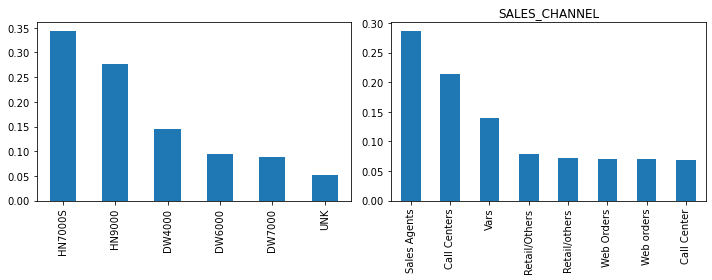

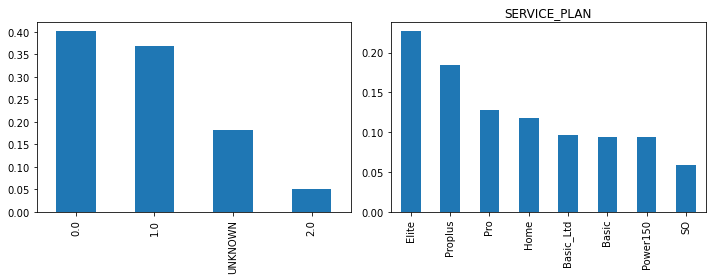

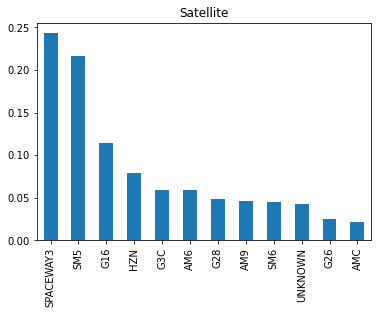

In [187]:
for i in range (0,len(cat_columns),2):
    if len(cat_columns) > i+1:
        
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        comp_data[cat_columns[i]].value_counts(normalize= True).plot(kind='bar')
        plt.subplot(122)
        comp_data[cat_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
        plt.title(cat_columns[i+1])
        plt.tight_layout()
        plt.show()
    else:
        comp_data[cat_columns[i]].value_counts(normalize= True).plot(kind='bar')
        plt.title(cat_columns[i])

In [188]:
comp_data.MARITAL_STATUS.value_counts()

0.0        8012
1.0        7343
UNKNOWN    3616
2.0         999
Name: MARITAL_STATUS, dtype: int64

In [189]:
comp_data.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

In [190]:
num_columns=comp_data.select_dtypes(include=["number"]).columns.tolist()
num_columns

['ACCOUNT_STATUS',
 'DIRECT_INDIRECT_CHANNEL',
 'FEEDBACK',
 'SITE_TYPE_DESC',
 'GENDER',
 'AGE',
 'INCOME',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER',
 'DURATION']

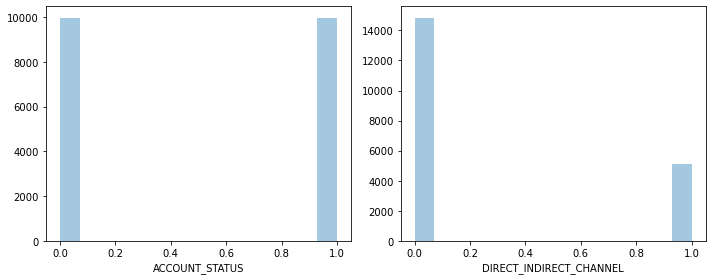

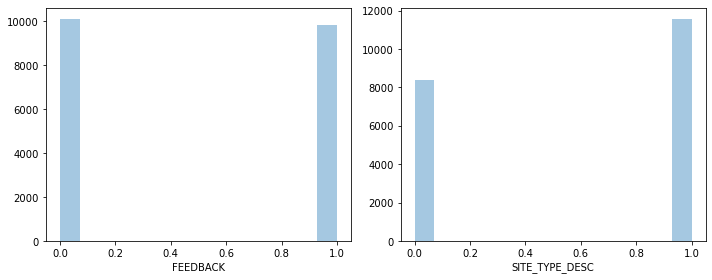

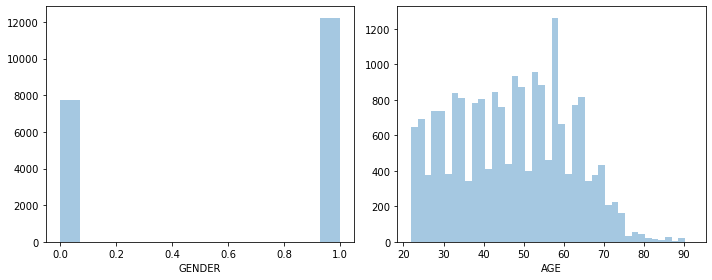

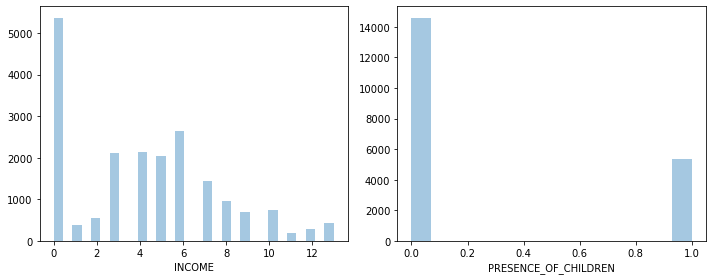

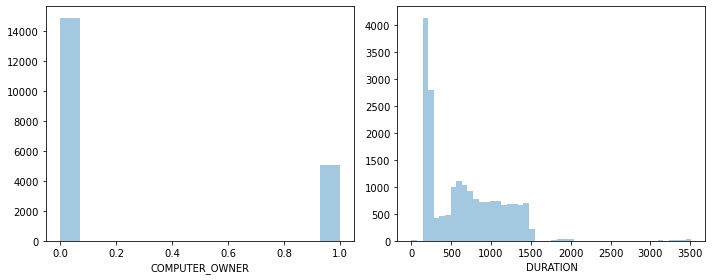

In [191]:

for i in range (0, len (num_columns),2):
    if len (num_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(comp_data[num_columns[i]], kde=False)
        plt.subplot(122)
        sns.distplot(comp_data[num_columns[i+1]], kde=False)
        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(comp_data[num_columns[i]],kde=False)

<AxesSubplot:xlabel='FEEDBACK', ylabel='count'>

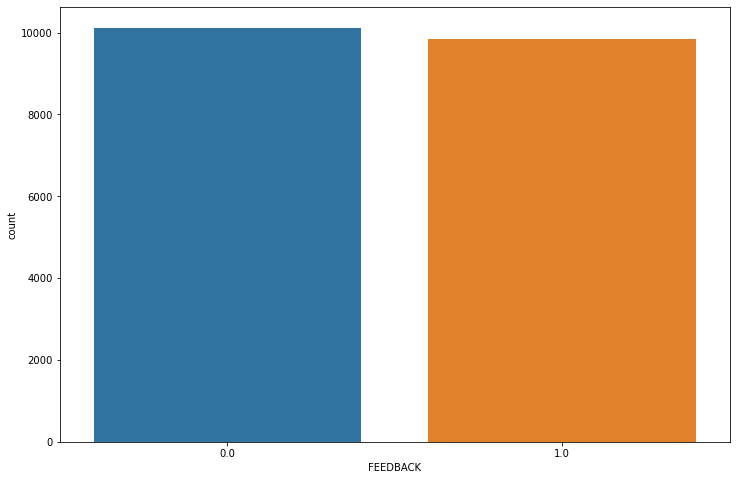

In [299]:
sns.countplot(x='FEEDBACK', data=comp_data)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

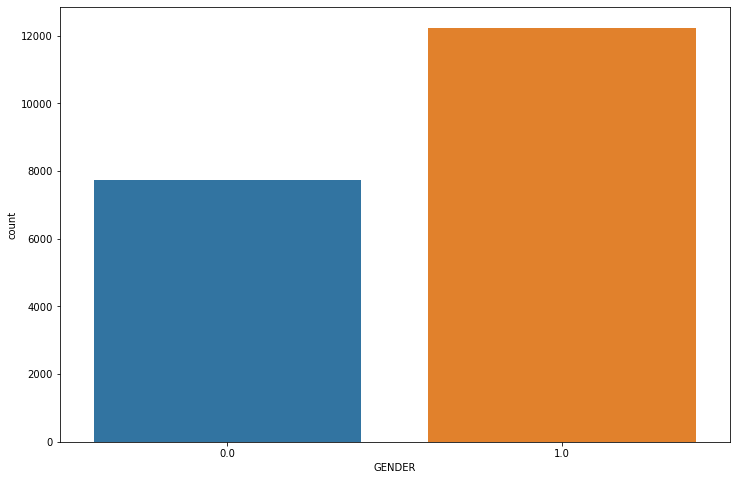

In [300]:
sns.countplot(x='GENDER', data=comp_data)

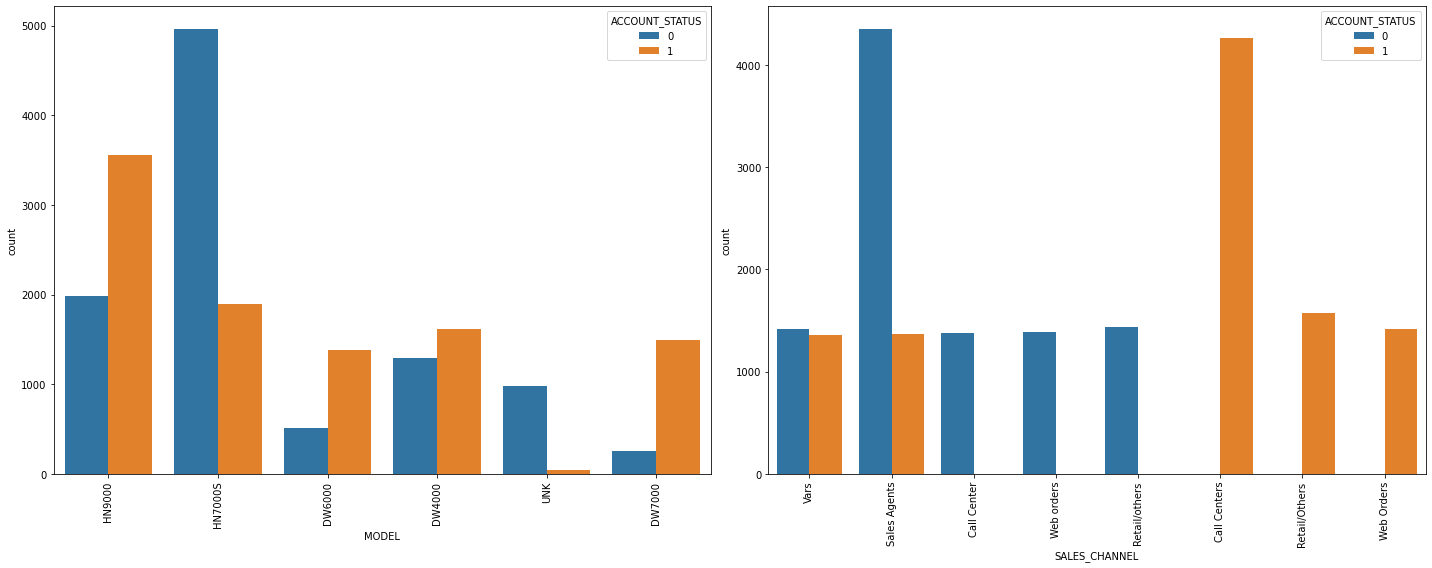

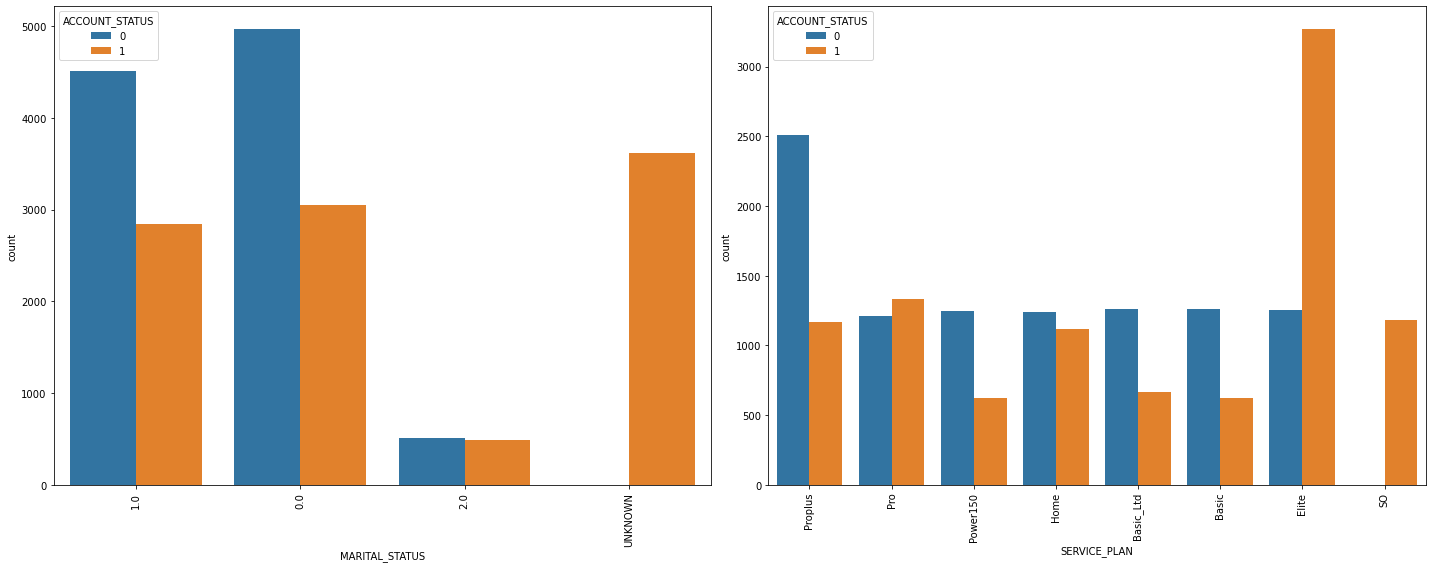

In [192]:
for i in range (0,len(cat_columns),2):
    if len(cat_columns) > i+1:
        
        plt.figure(figsize=(20,8))
        plt.subplot(121)
        sns.countplot(x=comp_data[cat_columns[i]],hue=comp_data['ACCOUNT_STATUS'], data=comp_data)
        plt.xticks(rotation=90)
        plt.subplot(122)
        sns.countplot(comp_data[cat_columns[i+1]],hue=comp_data['ACCOUNT_STATUS'],data=comp_data)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    

Marital_Status- 0-Single, 1-Married, 2-Divorced 


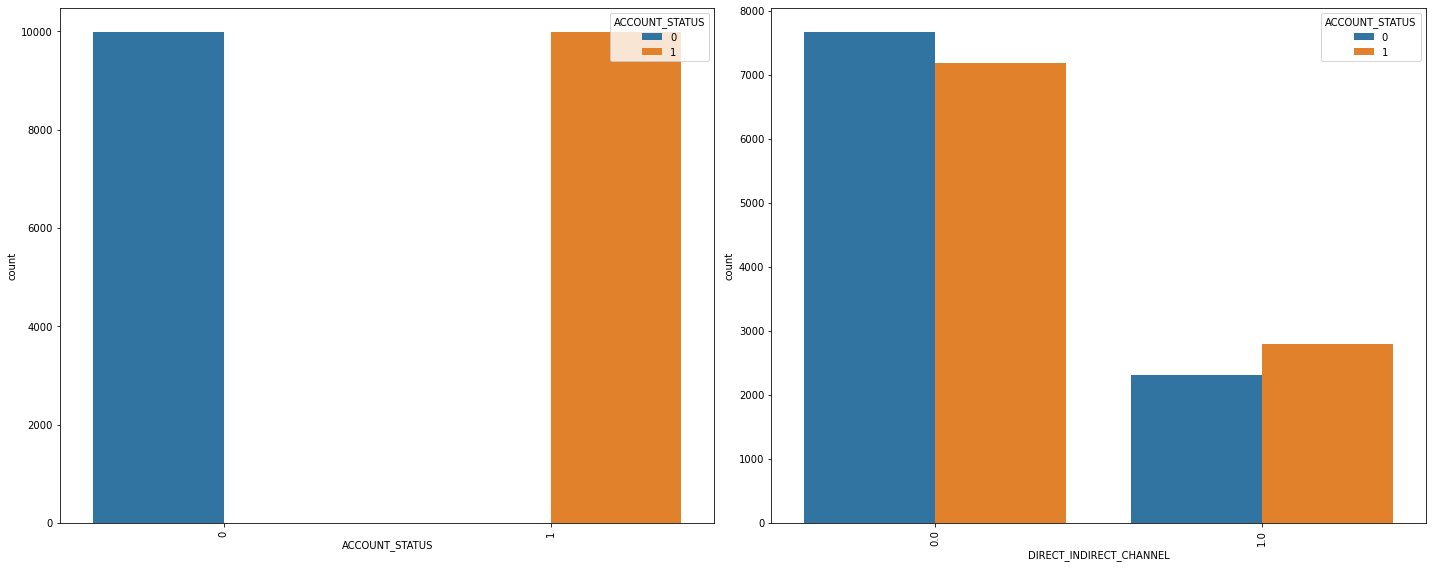

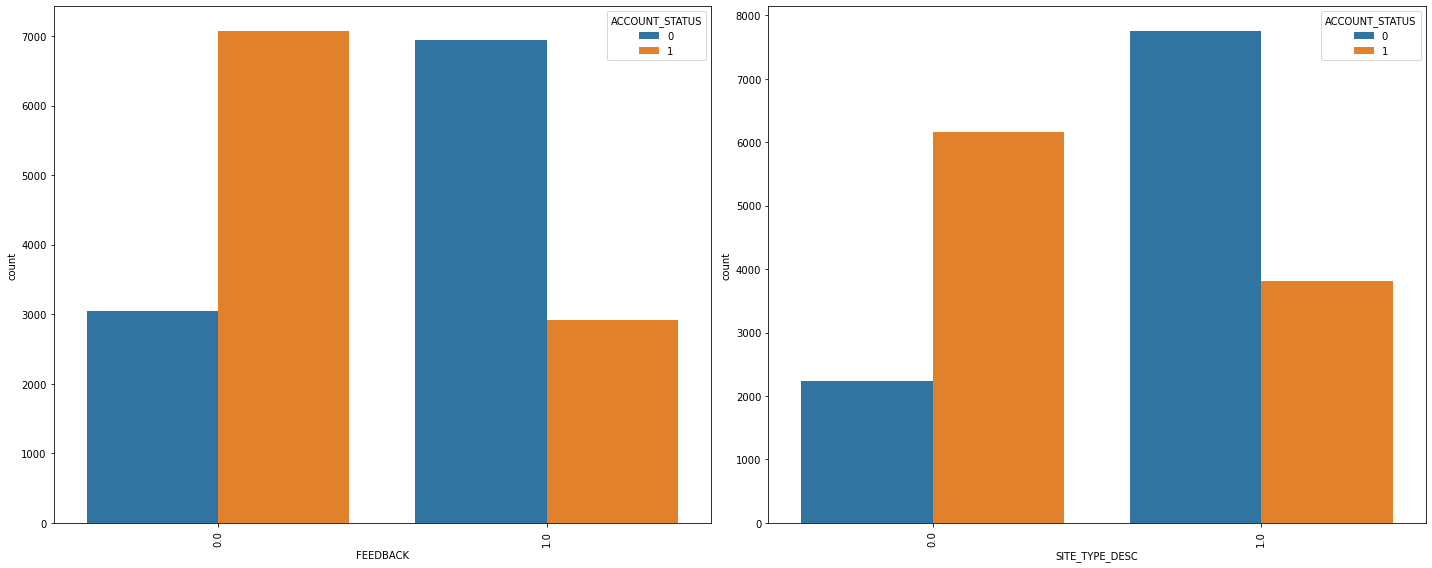

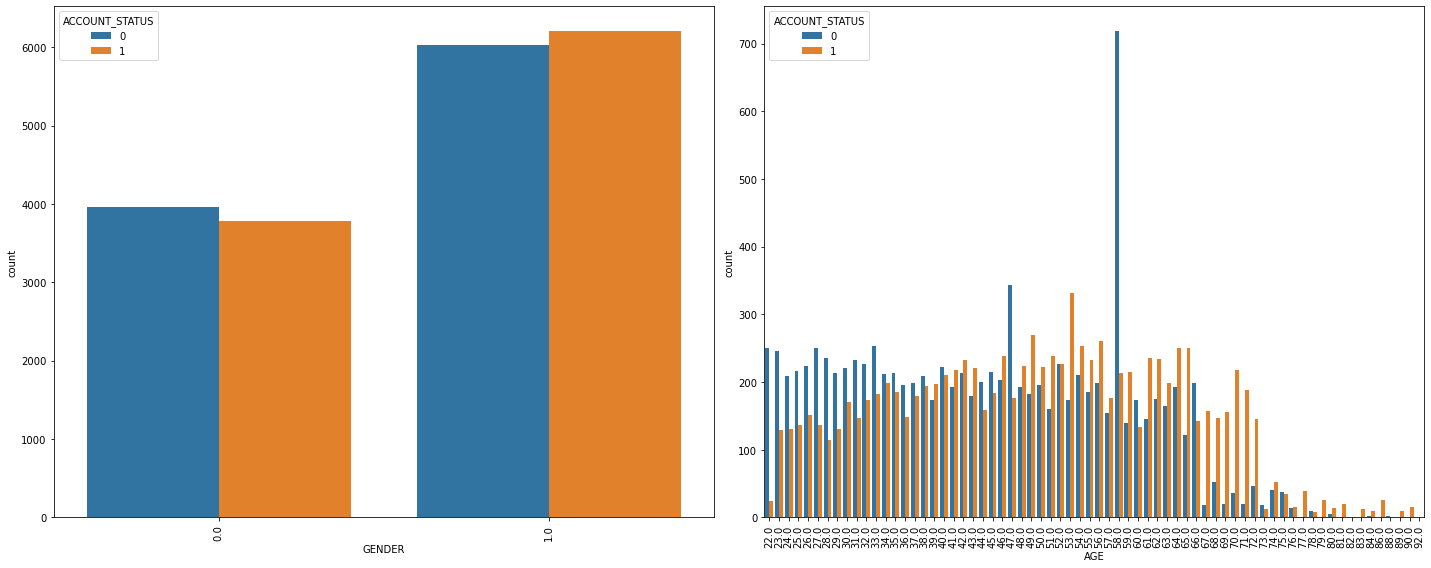

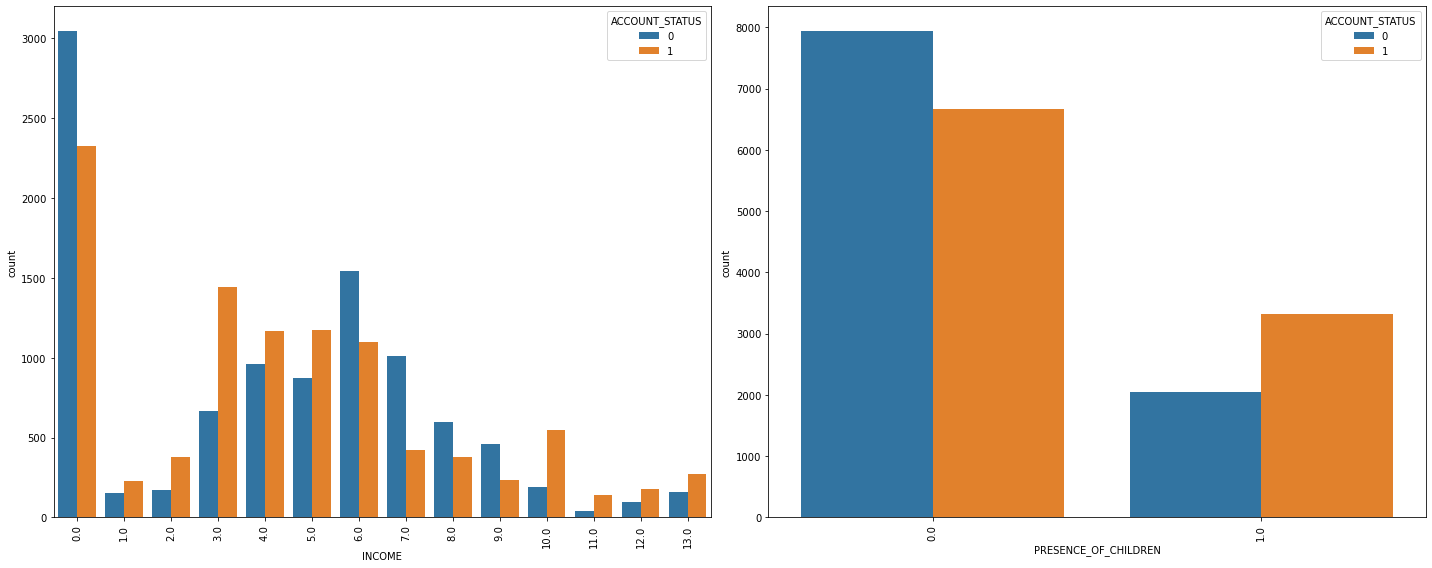

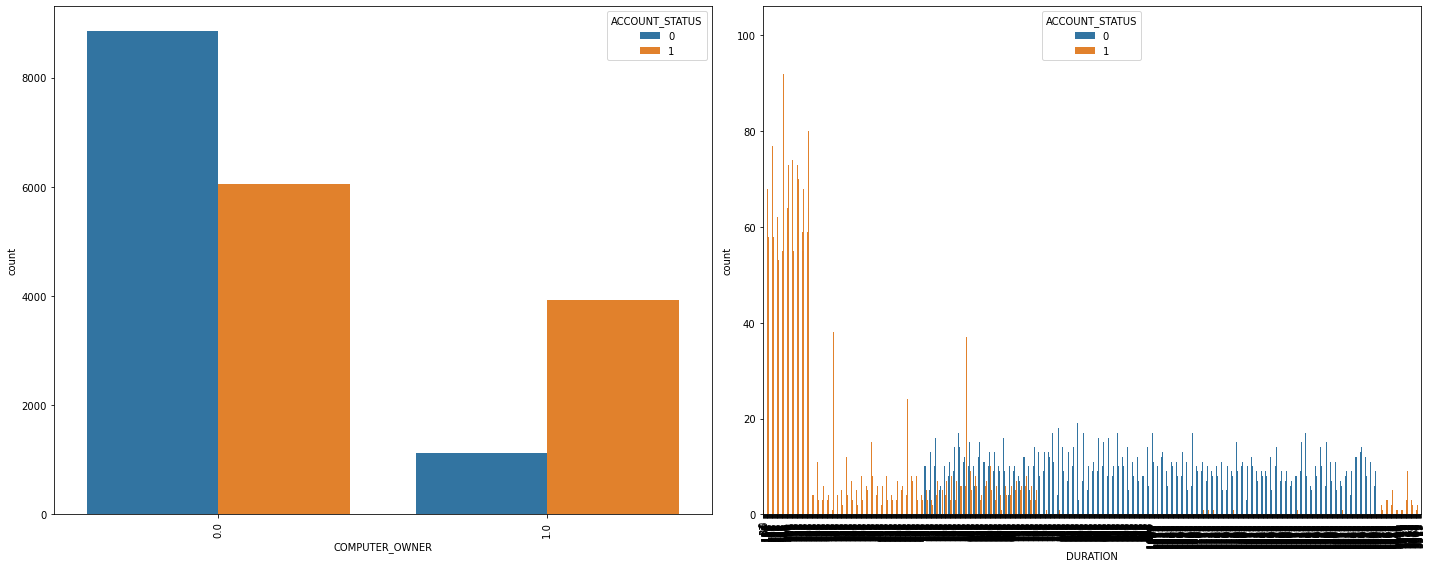

In [193]:
for i in range (0,len(num_columns),2):
    if len(num_columns) > i+1:
        
        plt.figure(figsize=(20,8))
        plt.subplot(121)
        sns.countplot(x=comp_data[num_columns[i]],hue=comp_data['ACCOUNT_STATUS'], data=comp_data)
        plt.xticks(rotation=90)
        plt.subplot(122)
        sns.countplot(comp_data[num_columns[i+1]],hue=comp_data['ACCOUNT_STATUS'],data=comp_data)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    

# <a id='8'>8. Standarizing the variables</a>

In [194]:

Active.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

In [195]:
X=pd.get_dummies(data=Active,columns=['MODEL', 'SALES_CHANNEL',
        'Satellite', 'SERVICE_PLAN', 'MARITAL_STATUS'])

In [196]:
X.dtypes

ACCOUNT_STATUS                  object
DIRECT_INDIRECT_CHANNEL        float64
FEEDBACK                       float64
SITE_TYPE_DESC                 float64
GENDER                         float64
AGE                            float64
INCOME                         float64
PRESENCE_OF_CHILDREN           float64
COMPUTER_OWNER                 float64
DURATION                         int64
MODEL_DW4000                     uint8
MODEL_DW6000                     uint8
MODEL_DW7000                     uint8
MODEL_HN7000S                    uint8
MODEL_HN9000                     uint8
MODEL_UNK                        uint8
SALES_CHANNEL_Call Center        uint8
SALES_CHANNEL_Retail/others      uint8
SALES_CHANNEL_Sales Agents       uint8
SALES_CHANNEL_Vars               uint8
SALES_CHANNEL_Web orders         uint8
Satellite_AM6                    uint8
Satellite_AM9                    uint8
Satellite_AMC                    uint8
Satellite_G16                    uint8
Satellite_G26            

In [197]:
X

,ACCOUNT_STATUS,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,DURATION,...,SERVICE_PLAN_Basic,SERVICE_PLAN_Basic_Ltd,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power150,SERVICE_PLAN_Pro,SERVICE_PLAN_Proplus,MARITAL_STATUS_0.0,MARITAL_STATUS_1.0,MARITAL_STATUS_2.0
0,Active,0.0,1.0,1.0,0.0,69.0,0.0,0.0,0.0,747,...,0,0,0,0,0,0,1,0,1,0
1,Active,0.0,1.0,0.0,0.0,43.0,4.0,0.0,0.0,1194,...,0,0,0,0,0,1,0,0,1,0
2,Active,0.0,0.0,1.0,0.0,58.0,4.0,0.0,0.0,1144,...,0,0,0,0,1,0,0,0,1,0
3,Active,1.0,1.0,0.0,1.0,22.0,6.0,1.0,0.0,1223,...,0,0,0,0,1,0,0,0,1,0
4,Active,0.0,1.0,1.0,1.0,36.0,7.0,0.0,0.0,838,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Active,0.0,1.0,1.0,1.0,32.0,4.0,0.0,0.0,1119,...,0,1,0,0,0,0,0,1,0,0
9994,Active,0.0,1.0,0.0,1.0,39.0,4.0,0.0,0.0,1150,...,0,0,0,1,0,0,0,1,0,0
9995,Active,1.0,1.0,1.0,1.0,58.0,0.0,0.0,0.0,1461,...,0,0,1,0,0,0,0,1,0,0
9996,Active,0.0,0.0,1.0,0.0,33.0,5.0,0.0,0.0,602,...,0,0,0,0,0,1,0,0,1,0


In [198]:
X.columns

Index(['ACCOUNT_STATUS', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK',
       'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'DURATION', 'MODEL_DW4000', 'MODEL_DW6000',
       'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000', 'MODEL_UNK',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'SALES_CHANNEL_Sales Agents', 'SALES_CHANNEL_Vars',
       'SALES_CHANNEL_Web orders', 'Satellite_AM6', 'Satellite_AM9',
       'Satellite_AMC', 'Satellite_G16', 'Satellite_G26', 'Satellite_G28',
       'Satellite_G3C', 'Satellite_HZN', 'Satellite_SM5', 'Satellite_SM6',
       'Satellite_SPACEWAY3', 'Satellite_UNKNOWN', 'SERVICE_PLAN_Basic',
       'SERVICE_PLAN_Basic_Ltd', 'SERVICE_PLAN_Elite', 'SERVICE_PLAN_Home',
       'SERVICE_PLAN_Power150', 'SERVICE_PLAN_Pro', 'SERVICE_PLAN_Proplus',
       'MARITAL_STATUS_0.0', 'MARITAL_STATUS_1.0', 'MARITAL_STATUS_2.0'],
      dtype='object')

In [199]:
from sklearn.preprocessing import StandardScaler  
import numpy as np

# standardized the dataset
sc_x = StandardScaler()    
X[['AGE', 'INCOME', 'DURATION']] = sc_x.fit_transform(X[['AGE', 'INCOME', 'DURATION']])

In [200]:
Y=X.drop(["ACCOUNT_STATUS"],axis=1)

In [201]:
X.drop(["ACCOUNT_STATUS"],axis=1,inplace=True)

In [202]:
from sklearn.decomposition import PCA as sklearnPCA

In [203]:
# create instance for pca
sklearn_pca = sklearnPCA()

# fit and transform the instance on datad
PC= sklearn_pca.fit_transform(X)


In [204]:
print(sklearn_pca.explained_variance_ratio_)

[1.34946352e-01 1.30739794e-01 1.29374038e-01 6.95815992e-02
 4.13707602e-02 4.03074281e-02 3.74306765e-02 2.93411392e-02
 2.86416682e-02 2.81350326e-02 2.56011358e-02 2.29865505e-02
 2.02028176e-02 1.88443036e-02 1.83399861e-02 1.82037732e-02
 1.81016834e-02 1.65170224e-02 1.64421857e-02 1.63752548e-02
 1.61688379e-02 1.59201550e-02 1.52178373e-02 1.39354731e-02
 1.32787318e-02 1.28877567e-02 9.72144829e-03 9.46761302e-03
 7.87355419e-03 7.69719347e-03 7.33892723e-03 3.69704366e-03
 2.98928089e-03 1.36057144e-03 4.43578384e-04 2.97894938e-04
 2.20901275e-04 2.66134753e-32 3.67973575e-33 2.86585819e-33
 1.71498393e-33 7.93676851e-34]


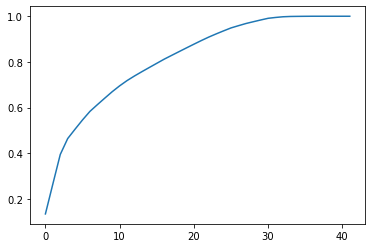

In [205]:
cum_sum = np.cumsum(sklearn_pca.explained_variance_ratio_)
plt.plot(cum_sum)

In [206]:
cum_sum[28]

0.9759546087091233

In [207]:
from sklearn.decomposition import PCA

In [208]:
pc=PCA(n_components=28)

In [209]:
X_comp=pc.fit_transform(X)


In [210]:
X_comp=pd.DataFrame(X_comp)
X_comp.shape

(9985, 28)

In [211]:
from sklearn.cluster import KMeans


Cluster 1 Inertia 73984.81721797703
Cluster 2 Inertia 66404.17167762524
Cluster 3 Inertia 61761.94961471183
Cluster 4 Inertia 58268.25922058205
Cluster 5 Inertia 55941.706754785475
Cluster 6 Inertia 53975.8538904835
Cluster 7 Inertia 52617.777941206616
Cluster 8 Inertia 51542.71820004032
Cluster 9 Inertia 50578.427817919815
Cluster 10 Inertia 49740.45622868795
Cluster 11 Inertia 49083.61113306054
Cluster 12 Inertia 48452.35819054337
Cluster 13 Inertia 47896.93170305638
Cluster 14 Inertia 47352.644404769184


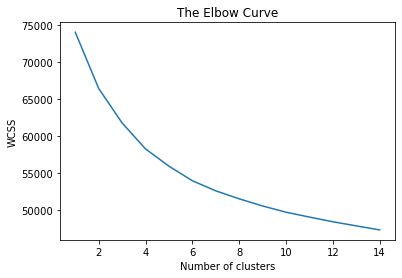

In [212]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_comp)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [213]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_comp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
X_comp['cluster'] = kmeans.labels_

In [215]:
X_comp.shape

(9985, 29)

In [216]:
Active.shape

(9985, 15)

In [217]:
Active['cluster']=kmeans.labels_

In [218]:
X_comp.cluster.value_counts()

0    2595
1    2559
3    2457
2    2374
Name: cluster, dtype: int64

Text(0, 0.5, 'Count')

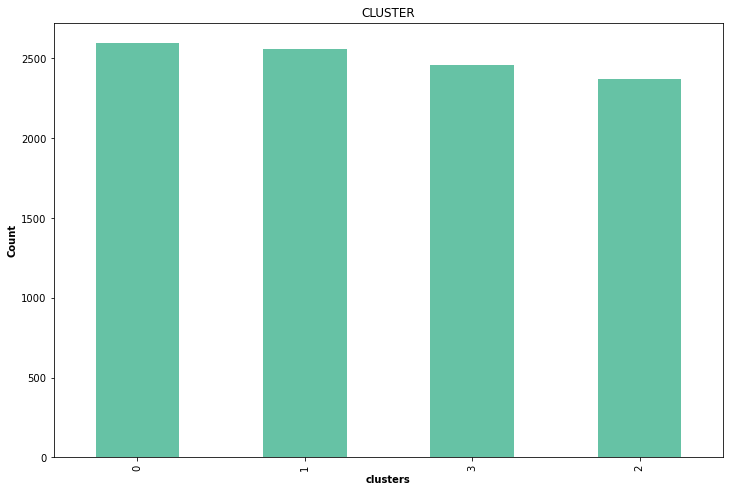

In [219]:
plt.rcParams['figure.figsize'] = [12,8]
ax=X_comp['cluster'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set2')
ax.title.set_text('CLUSTER')
plt.xlabel("clusters",fontweight = 'bold')
plt.ylabel("Count",fontweight = 'bold')

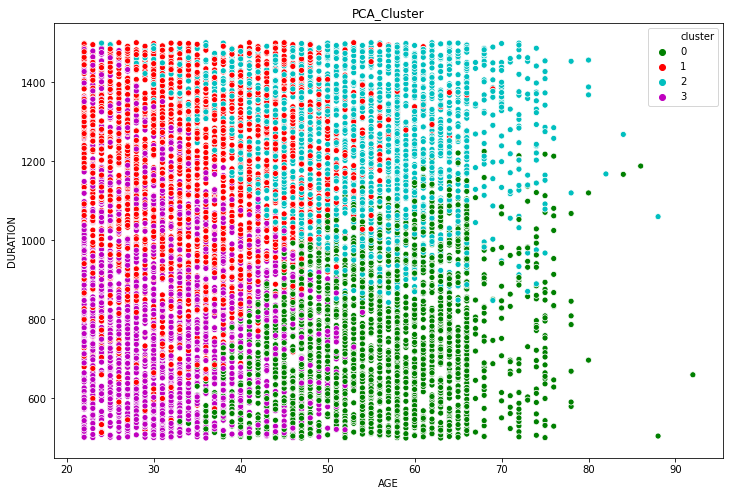

In [220]:
sns.scatterplot(x=Active.AGE, y=Active.DURATION, hue=Active.cluster, palette=['g','r','c','m'])
plt.title("PCA_Cluster")
plt.show()

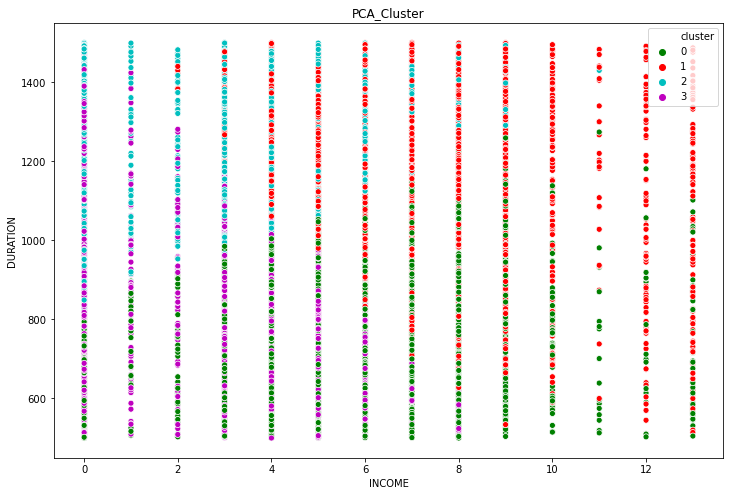

In [221]:
sns.scatterplot(x=Active.INCOME, y=Active.DURATION, hue=Active.cluster, palette=['g','r','c','m'])
plt.title("PCA_Cluster")
plt.show()

In [222]:

Active.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION', 'cluster'],
      dtype='object')

In [223]:
Active.groupby(['cluster'])['AGE'].mean()


cluster
0    55.800771
1    35.316530
2    54.013479
3    32.562475
Name: AGE, dtype: float64

In [224]:
Active.groupby(['cluster'])['INCOME'].mean()


cluster
0    5.292486
1    7.228605
2    2.163858
3    1.739927
Name: INCOME, dtype: float64

In [225]:
Active.groupby(['cluster'])['DURATION'].mean()


cluster
0     755.580732
1    1155.795623
2    1251.844145
3     838.597477
Name: DURATION, dtype: float64

In [226]:
X_comp.shape

(9985, 29)

<AxesSubplot:xlabel='cluster', ylabel='count'>

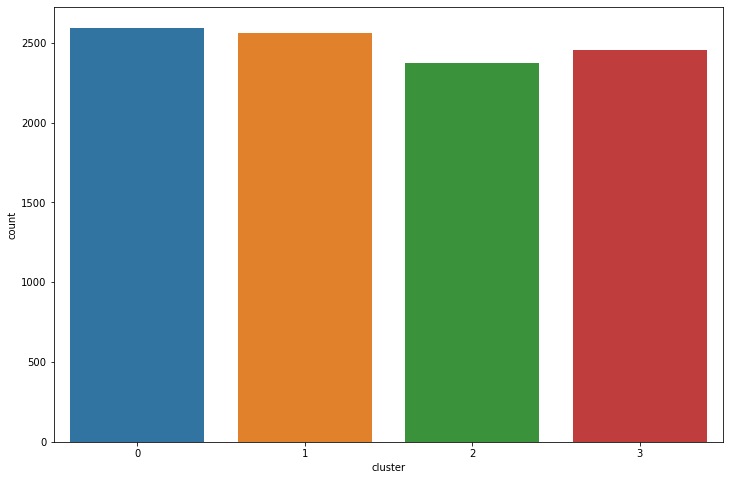

In [227]:
sns.countplot(Active.cluster)

In [228]:
comp_data

,ACCOUNT_STATUS,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN,Satellite,DURATION
0,0,HN9000,Vars,0.0,1.0,1.0,0.0,69.0,0.0,1,0.0,0.0,Proplus,SPACEWAY3,747
1,0,HN7000S,Sales Agents,0.0,1.0,0.0,0.0,43.0,4.0,1,0.0,0.0,Pro,HZN,1194
2,0,HN9000,Call Center,0.0,0.0,1.0,0.0,58.0,4.0,1,0.0,0.0,Power150,SM5,1144
3,0,DW6000,Sales Agents,1.0,1.0,0.0,1.0,22.0,6.0,1,1.0,0.0,Power150,SPACEWAY3,1223
4,0,HN7000S,Call Center,0.0,1.0,1.0,1.0,36.0,7.0,0,0.0,0.0,Home,UNKNOWN,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,HN9000,Call Centers,0.0,1.0,0.0,0.0,49.0,3.0,UNKNOWN,1.0,0.0,Basic,G28,230
9996,1,DW6000,Retail/Others,1.0,0.0,0.0,0.0,38.0,2.0,1,1.0,1.0,Proplus,G28,180
9997,1,DW4000,Retail/Others,0.0,0.0,1.0,0.0,67.0,8.0,0,0.0,0.0,Home,SPACEWAY3,3058
9998,1,DW6000,Call Centers,0.0,0.0,1.0,1.0,63.0,0.0,UNKNOWN,0.0,0.0,Power150,SPACEWAY3,269


In [229]:
comp_data.columns

Index(['ACCOUNT_STATUS', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN', 'Satellite', 'DURATION'],
      dtype='object')

In [230]:
x=dummies
y=comp_data['ACCOUNT_STATUS']

In [231]:
x.columns

Index(['ACCOUNT_STATUS', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK',
       'SITE_TYPE_DESC', 'GENDER', 'AGE', 'INCOME', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'DURATION', 'MODEL_DW4000', 'MODEL_DW6000',
       'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000', 'MODEL_UNK',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Call Centers',
       'SALES_CHANNEL_Retail/Others', 'SALES_CHANNEL_Retail/others',
       'SALES_CHANNEL_Sales Agents', 'SALES_CHANNEL_Vars',
       'SALES_CHANNEL_Web Orders', 'SALES_CHANNEL_Web orders', 'Satellite_AM6',
       'Satellite_AM9', 'Satellite_AMC', 'Satellite_G16', 'Satellite_G26',
       'Satellite_G28', 'Satellite_G3C', 'Satellite_HZN', 'Satellite_SM5',
       'Satellite_SM6', 'Satellite_SPACEWAY3', 'Satellite_UNKNOWN',
       'SERVICE_PLAN_Basic', 'SERVICE_PLAN_Basic_Ltd', 'SERVICE_PLAN_Elite',
       'SERVICE_PLAN_Home', 'SERVICE_PLAN_Power150', 'SERVICE_PLAN_Pro',
       'SERVICE_PLAN_Proplus', 'SERVICE_PLAN_SO', 'MARITAL_STATUS_0.0',
       '

In [232]:
x.drop(['DURATION'], axis=1, inplace=True)
x.drop(['ACCOUNT_STATUS'], axis=1, inplace=True)

In [233]:
sc = StandardScaler()    
x[['AGE', 'INCOME']] = sc.fit_transform(x[['AGE', 'INCOME']])

In [234]:
x

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,MODEL_DW4000,MODEL_DW6000,...,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power150,SERVICE_PLAN_Pro,SERVICE_PLAN_Proplus,SERVICE_PLAN_SO,MARITAL_STATUS_0.0,MARITAL_STATUS_1.0,MARITAL_STATUS_2.0,MARITAL_STATUS_UNKNOWN
0,0.0,1.0,1.0,0.0,1.546113,-1.227963,0.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.0,1.0,0.0,0.0,-0.280064,-0.071981,0.0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.773499,-0.071981,0.0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,1.0,0.0,1.0,-1.755053,0.506010,1.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,-0.771727,0.795005,0.0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.0,0.0,0.141361,-0.360977,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,1.0,0.0,0.0,0.0,-0.631252,-0.649972,1.0,1.0,0,1,...,0,0,0,0,1,0,0,1,0,0
9997,0.0,0.0,1.0,0.0,1.405637,1.084001,0.0,0.0,1,0,...,0,1,0,0,0,0,1,0,0,0
9998,0.0,0.0,1.0,1.0,1.124687,-1.227963,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [235]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: ACCOUNT_STATUS, Length: 19970, dtype: int64

In [236]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [237]:
x_train

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,MODEL_DW4000,MODEL_DW6000,...,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power150,SERVICE_PLAN_Pro,SERVICE_PLAN_Proplus,SERVICE_PLAN_SO,MARITAL_STATUS_0.0,MARITAL_STATUS_1.0,MARITAL_STATUS_2.0,MARITAL_STATUS_UNKNOWN
8284,0.0,0.0,0.0,1.0,0.141361,0.506010,1.0,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
454,0.0,1.0,1.0,0.0,-1.614577,0.795005,0.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
7827,0.0,0.0,0.0,0.0,0.071124,-0.360977,0.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8220,0.0,1.0,1.0,0.0,-0.912202,1.661991,1.0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2865,0.0,1.0,1.0,1.0,0.913975,-1.227963,0.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,0.0,0.0,0.0,1.0,0.703262,-1.227963,1.0,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
1984,0.0,0.0,1.0,0.0,0.000886,0.217014,1.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
5397,0.0,1.0,0.0,0.0,-0.069351,-1.227963,0.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
860,0.0,1.0,0.0,0.0,0.000886,0.506010,0.0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [238]:
x_test

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,GENDER,AGE,INCOME,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,MODEL_DW4000,MODEL_DW6000,...,SERVICE_PLAN_Elite,SERVICE_PLAN_Home,SERVICE_PLAN_Power150,SERVICE_PLAN_Pro,SERVICE_PLAN_Proplus,SERVICE_PLAN_SO,MARITAL_STATUS_0.0,MARITAL_STATUS_1.0,MARITAL_STATUS_2.0,MARITAL_STATUS_UNKNOWN
6253,0.0,1.0,1.0,1.0,-0.280064,-0.360977,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
3216,0.0,0.0,1.0,1.0,-0.490777,-0.649972,0.0,1.0,0,0,...,0,0,0,0,1,0,1,0,0,0
8950,0.0,0.0,0.0,0.0,-1.544340,-0.071981,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4106,0.0,0.0,1.0,0.0,0.211599,1.661991,0.0,0.0,0,0,...,0,0,0,0,1,0,1,0,0,0
6595,0.0,0.0,0.0,1.0,-1.614577,0.506010,0.0,0.0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,1.0,1.0,0.0,1.0,0.281837,-0.071981,0.0,1.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4453,0.0,1.0,1.0,1.0,0.352074,0.217014,0.0,0.0,0,0,...,0,0,0,1,0,0,1,0,0,0
7824,0.0,0.0,1.0,0.0,-0.561014,0.217014,0.0,0.0,1,0,...,1,0,0,0,0,0,1,0,0,0
5258,0.0,1.0,1.0,0.0,0.071124,1.661991,1.0,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Random_Forest

In [239]:
rf = RandomForestClassifier(random_state=42 )
rf.fit(x_train, y_train)
train_pred = rf.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
y_pred = rf.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("Train", roc_auc1)
print("Test", roc_auc2)

Train 1.0
Test 0.9804537004505708


In [240]:
from sklearn.metrics import *

In [241]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7968
           1       1.00      1.00      1.00      8008

    accuracy                           1.00     15976
   macro avg       1.00      1.00      1.00     15976
weighted avg       1.00      1.00      1.00     15976



In [242]:
print(confusion_matrix(y_train, train_pred))

[[7968    0]
 [   0 8008]]


In [243]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2017
           1       0.98      0.98      0.98      1977

    accuracy                           0.98      3994
   macro avg       0.98      0.98      0.98      3994
weighted avg       0.98      0.98      0.98      3994



In [244]:
print(confusion_matrix(y_test, y_pred))

[[1981   36]
 [  42 1935]]


# Cross-validation

In [245]:
import time

In [246]:
from sklearn.model_selection import RandomizedSearchCV

rff = RandomForestClassifier(random_state=42)
start = time.time()


param = {
              'max_depth':[49,50,51,52,53],
              'min_samples_split':[17,18,19,20,21],
              'n_estimators':[33,34,35,36,37],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']
}

r_search = RandomizedSearchCV( estimator = rff, param_distributions = param , scoring="accuracy",
                             n_jobs=-1, cv=10, verbose=2 , refit=True)

In [247]:
r_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.3s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [248]:
r_search.best_params_

{'n_estimators': 36,
 'min_samples_split': 21,
 'max_features': 'auto',
 'max_depth': 53,
 'criterion': 'entropy',
 'bootstrap': False}

In [249]:
r_search.best_score_

0.9789056530431356

In [250]:
fpr, tpr, threshold = roc_curve(y_train, train_pred)

In [251]:
import matplotlib.pyplot as plt

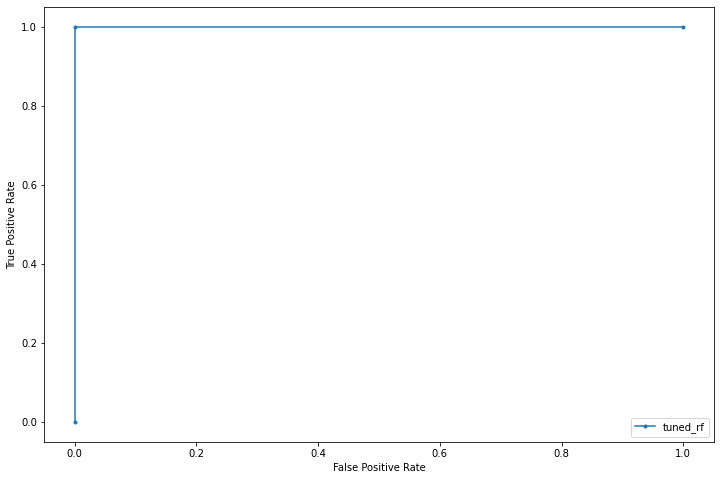

In [252]:

plt.plot(fpr, tpr, marker='.', label='tuned_rf')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [253]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

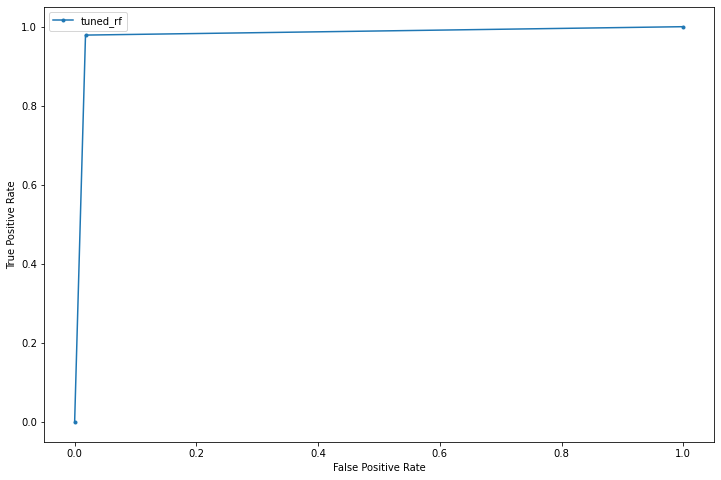

In [254]:
plt.plot(fpr, tpr, marker='.', label='tuned_rf')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# tuned_rf

In [255]:
tuned_rf = RandomForestClassifier(n_estimators= 34,
 min_samples_split=18,
 max_features= 'sqrt',
 max_depth=53,
 criterion= 'gini',
 bootstrap= False , random_state=42 )

tuned_rf.fit(x_train, y_train)
train_pred = tuned_rf.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
y_pred = tuned_rf.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("Train", roc_auc1)
print("Test", roc_auc2)

Train 0.9903039982106246
Test 0.9801857453927905


In [256]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7968
           1       0.99      0.99      0.99      8008

    accuracy                           0.99     15976
   macro avg       0.99      0.99      0.99     15976
weighted avg       0.99      0.99      0.99     15976



In [257]:
print(confusion_matrix(y_train, train_pred))

[[7910   58]
 [  97 7911]]


In [258]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2017
           1       0.98      0.98      0.98      1977

    accuracy                           0.98      3994
   macro avg       0.98      0.98      0.98      3994
weighted avg       0.98      0.98      0.98      3994



In [259]:
print(confusion_matrix(y_test, y_pred))

[[1984   33]
 [  46 1931]]


In [295]:
pd.DataFrame({'feature': list(x_train.columns),
                   'importance': tuned_rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
15,SALES_CHANNEL_Call Centers,0.161356
45,MARITAL_STATUS_UNKNOWN,0.115539
2,SITE_TYPE_DESC,0.069614
1,FEEDBACK,0.068548
30,Satellite_SM5,0.063493
16,SALES_CHANNEL_Retail/Others,0.049515
20,SALES_CHANNEL_Web Orders,0.043396
32,Satellite_SPACEWAY3,0.037598
18,SALES_CHANNEL_Sales Agents,0.036877
17,SALES_CHANNEL_Retail/others,0.035448


# xgboost

In [260]:
from xgboost import XGBClassifier 


In [261]:
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
train_pred =xgb.predict(x_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
y_pred = xgb.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("Train", roc_auc1)
print("Test", roc_auc2)

Train 0.9971216032963021
Test 0.9837314791896599


In [262]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7968
           1       1.00      1.00      1.00      8008

    accuracy                           1.00     15976
   macro avg       1.00      1.00      1.00     15976
weighted avg       1.00      1.00      1.00     15976



In [263]:
print(confusion_matrix(y_train, train_pred))

[[7948   20]
 [  26 7982]]


In [264]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2017
           1       0.98      0.98      0.98      1977

    accuracy                           0.98      3994
   macro avg       0.98      0.98      0.98      3994
weighted avg       0.98      0.98      0.98      3994



In [265]:
print(confusion_matrix(y_test, y_pred))

[[1983   34]
 [  31 1946]]


# cross-validation

In [266]:
from sklearn.model_selection import RandomizedSearchCV

param_1 = {
    "max_depth":[17,18,19,20],
    "min_child_weight": [4,5,6,7,8],
    "gamma": [0.4,0.5,0.6],
    "subsample":[0.6,0.7,0.8,0.9],
    "colsample_bytree":[0.6,0.7,0.8,0.9],
    "n_estimators":[200,225,250],
    "learning_rate":[0.05,0.1,0.2]
}

rsearch_xgb = RandomizedSearchCV( estimator = XGBClassifier ( objective = "binary:logistic", nthread=4, seed=88),
                  param_distributions = param_1 , scoring="accuracy", n_jobs=-1, cv=10, verbose=2 , refit=True)

In [267]:
rsearch_xgb.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                      

In [268]:
rsearch_xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 250,
 'min_child_weight': 6,
 'max_depth': 17,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.6}

In [269]:
rsearch_xgb.best_score_

0.9819733574294103

# tunned 

In [296]:
tuned_xgb=XGBClassifier(subsample=0.8,
 n_estimators= 225,
 min_child_weight=4,
 max_depth= 19,
 learning_rate= 0.05,
 gamma=0.6,
 colsample_bytree= 0.6)

xgb.fit(x_train, y_train)
train_pred =xgb.predict(x_train)
train_pred_prob =xgb.predict_proba(x_train)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
y_pred = xgb.predict(x_test)

test_pred_prob =xgb.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("Train", roc_auc1)
print("Test", roc_auc2)

Train 0.992738749704111
Test 0.9842222494733059


In [271]:
print(classification_report(y_train, train_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7968
           1       0.99      0.99      0.99      8008

    accuracy                           0.99     15976
   macro avg       0.99      0.99      0.99     15976
weighted avg       0.99      0.99      0.99     15976



In [272]:
print(confusion_matrix(y_train, train_pred))

[[7909   59]
 [  57 7951]]


In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2017
           1       0.98      0.98      0.98      1977

    accuracy                           0.98      3994
   macro avg       0.98      0.98      0.98      3994
weighted avg       0.98      0.98      0.98      3994



In [274]:
print(confusion_matrix(y_test, y_pred))

[[1986   31]
 [  32 1945]]


In [275]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

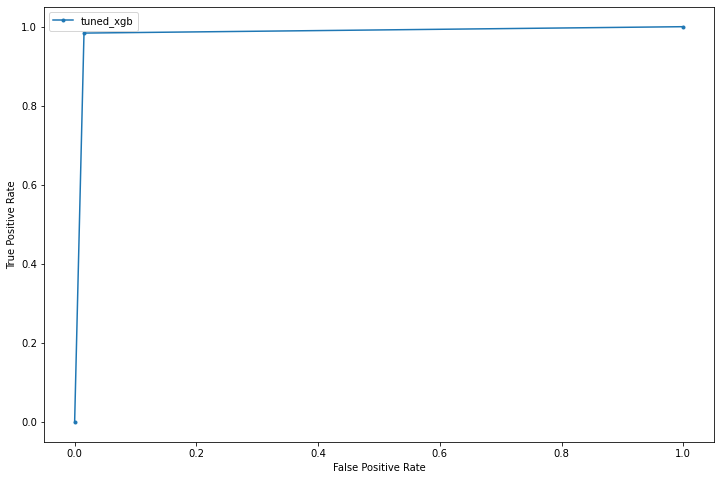

In [276]:
plt.plot(fpr, tpr, marker='.', label='tuned_xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [277]:
fpr, tpr, threshold = roc_curve(y_train, train_pred)

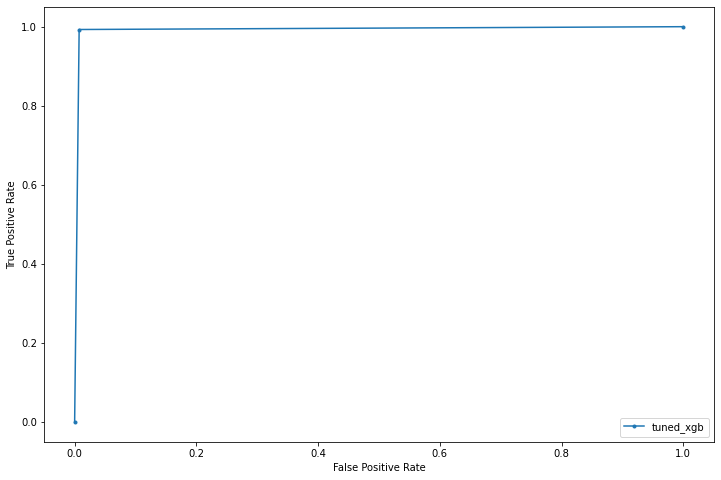

In [323]:
plt.plot(fpr, tpr, marker='.', label='tuned_xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [279]:

import scikitplot as skplt

In [280]:
np.array(y_train)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

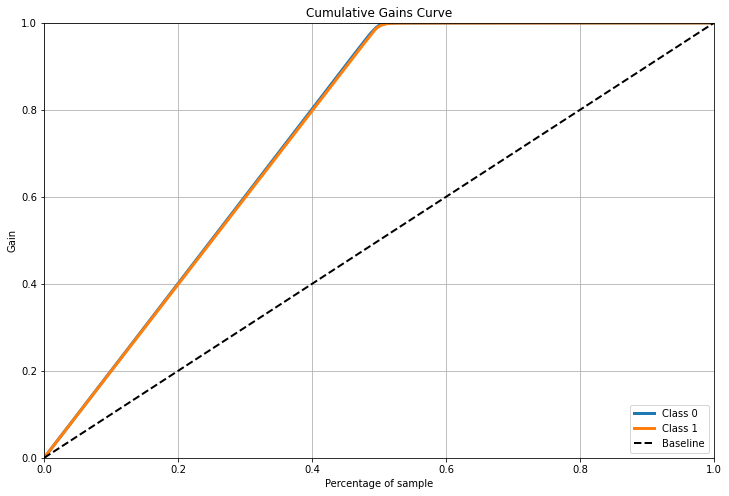

In [281]:
skplt.metrics.plot_cumulative_gain(y_train,train_pred_prob)
plt.show()

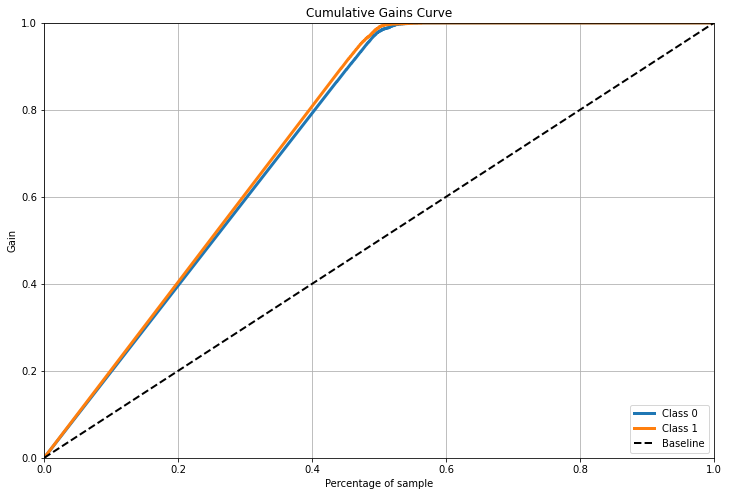

In [282]:
skplt.metrics.plot_cumulative_gain(y_test,test_pred_prob)
plt.show()

In [283]:
def profile_decile(x,y, trained_model):
    X_1=x.copy()
    y_1=y.copy()
    y_pred=trained_model.predict(X_1)
    X_1["Prob_event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred
    X_1["Rank"]=pd.qcut(X_1["Prob_event"].rank(method='first'), 10 ,labels = np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    profile=pd.DataFrame(X_1.groupby("Decile")\
                        .apply(lambda x: pd.Series({
        "min_score": x["Prob_event"].min(),
        "max_score": x["Prob_event"].max(),
        "Bad":x["Y_actual"].sum(),
        "Good":x["Y_actual"].count()-x["Y_actual"].sum(),
        "Total":x["Y_actual"].count() })))
    return profile

# Profile_decile for tuned_rf

In [284]:
#for training_data

profile_train=profile_decile(x_train, y_train, tuned_rf)

In [285]:
profile_train

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,1.000000,1.000000,1598.0,0.0,1598.0
2,0.998270,1.000000,1597.0,0.0,1597.0
3,0.988749,0.998270,1598.0,0.0,1598.0
4,0.951874,0.988688,1597.0,0.0,1597.0
5,0.478229,0.951788,1527.0,71.0,1598.0
6,0.061553,0.475174,91.0,1506.0,1597.0
7,0.019655,0.061480,0.0,1598.0,1598.0
8,0.004202,0.019651,0.0,1597.0,1597.0
9,0.000000,0.004202,0.0,1598.0,1598.0


In [286]:
#for testing_data

profile_test=profile_decile(x_test, y_test, tuned_rf)

In [287]:
profile_test

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,1.000000,1.000000,400.0,0.0,400.0
2,0.997738,1.000000,399.0,0.0,399.0
3,0.981834,0.997738,399.0,0.0,399.0
4,0.928676,0.981820,400.0,0.0,400.0
5,0.429542,0.928094,351.0,48.0,399.0
6,0.090354,0.428160,26.0,373.0,399.0
7,0.025123,0.090278,2.0,398.0,400.0
8,0.006202,0.025058,0.0,399.0,399.0
9,0.000000,0.006162,0.0,399.0,399.0


# Profile_decicle for xgboost

In [288]:
XGBprofile_train=profile_decile(x_train, y_train, xgb)

In [289]:
XGBprofile_train

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.999421,0.999849,1598.0,0.0,1598.0
2,0.998945,0.999421,1597.0,0.0,1597.0
3,0.997899,0.998945,1598.0,0.0,1598.0
4,0.993575,0.997897,1597.0,0.0,1597.0
5,0.529668,0.993572,1553.0,45.0,1598.0
6,0.011735,0.529521,65.0,1532.0,1597.0
7,0.003171,0.011676,0.0,1598.0,1598.0
8,0.001254,0.003167,0.0,1597.0,1597.0
9,0.000556,0.001254,0.0,1598.0,1598.0


In [290]:
XGBprofile_train.to_csv("train_profile_2.csv")

In [291]:
XGBprofile_test=profile_decile(x_test, y_test, xgb)

In [292]:
XGBprofile_test

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.999396,0.999812,400.0,0.0,400.0
2,0.998862,0.999393,399.0,0.0,399.0
3,0.997699,0.998861,399.0,0.0,399.0
4,0.992036,0.997698,400.0,0.0,400.0
5,0.398791,0.991999,359.0,40.0,399.0
6,0.014634,0.398675,20.0,379.0,399.0
7,0.003080,0.014604,0.0,400.0,400.0
8,0.001235,0.003075,0.0,399.0,399.0
9,0.000567,0.001228,0.0,399.0,399.0


In [293]:
XGBprofile_test.to_csv("test_profile_2.csv")

In [314]:
 from sklearn import metrics

In [301]:
from sklearn.svm import SVC
svm_model= SVC(probability=True)

In [316]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
accuracy_score= metrics.accuracy_score(y_test,y_pred)
print(accuracy_score)
y_predict_tra=svc.predict(x_train)
accuracy_score_tra= metrics.accuracy_score(y_train,train_pred)
print(accuracy_score_tra)

0.9842263395092639
0.9927391086629945


In [317]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.01)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [325]:
from sklearn.model_selection import RandomizedSearchCV

In [326]:
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [329]:
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.9757136542782423


In [330]:
print(model_svm.best_params_) # finding best parameter

{'kernel': 'poly', 'gamma': 0.04, 'degree': 2, 'C': 0.6}


In [337]:
svc_poly=SVC(C=.6, degree=2,gamma=.04, kernel="poly" , verbose=True)

In [338]:
svc_poly.fit(x_train,y_train)

[LibSVM]

SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.04, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [353]:
y_pred=svc_poly.predict(x_train)

In [354]:
svc_poly.score(x_train, y_train)

0.9767776664997496

In [355]:
svc_poly.score(x_test, y_test)

0.9764646970455684

In [347]:
#y_pred= svc_poly.predict(x_train)
#print(metrics.accuracy_score(train_pred,y_train))

0.9927391086629945


In [357]:
y_predict_test= svc_poly.predict(x_test)
print(metrics.accuracy_score(y_pred_test,y_test))

0.9764646970455684


In [358]:
svc=SVC(kernel='poly', degree=2, C=0.6, gamma=.04, probability=True, verbose=True)
svc.fit(x_train,y_train)
y_pred_train= svc.predict(x_train)
print(metrics.accuracy_score(y_pred,y_train))
y_pred_test= svc.predict(x_test)
print(metrics.accuracy_score(y_pred_test,y_test))


[LibSVM]0.9767776664997496
0.9764646970455684


In [359]:
metrics.confusion_matrix(y_train, y_pred)

array([[7846,  122],
       [ 249, 7759]], dtype=int64)

In [360]:
print(metrics.classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7968
           1       0.98      0.97      0.98      8008

    accuracy                           0.98     15976
   macro avg       0.98      0.98      0.98     15976
weighted avg       0.98      0.98      0.98     15976



In [371]:
fpr, tpr, threshold = roc_curve(y_train, y_pred)

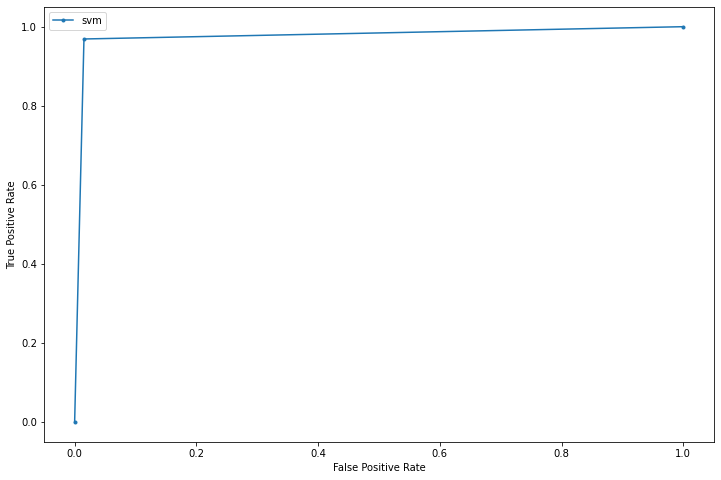

In [372]:
plt.plot(fpr, tpr, marker='.', label='svm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [373]:
fpr, tpr, threshold = roc_curve(y_pred_test,y_test)

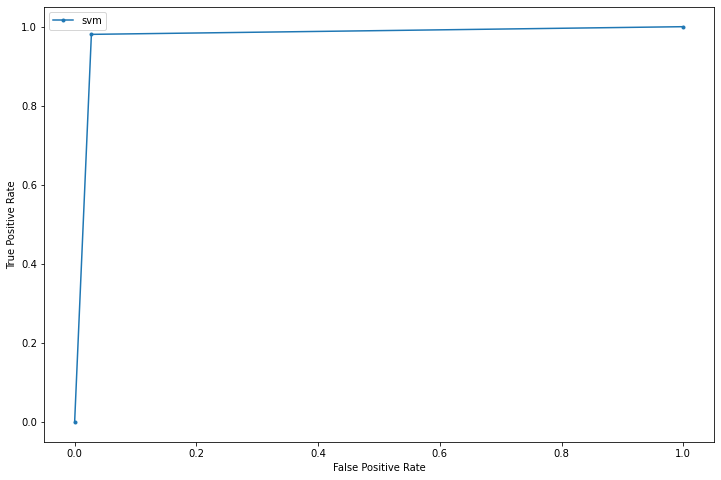

In [374]:
plt.plot(fpr, tpr, marker='.', label='svm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#thanks